#Машинное обучение, Лабораторная работа №1

**Преподаватель**: Свинцов М. В.

**Выполнили**: Румянцев А. А. 368731, Чебаненко Д. А. 367609, R3341, МашОб 31 1.4

**Цель работы**: научиться применять инструменты для подготовки данных

**Инструменты**: pandas, numpy, scipy, matplotlib/seaborn

##Содержание

Для предложенных датасетов провести первичный статистический анализ. Для этого необходимо:
1. Вычислить меры центральной тенденции (выборочное среднее, медиана, мода и т.д.)
2. Вычислить меры разброса (дисперсия, среднеквадратичное отклонение, min/max-value, IQR)
3. Вычислить параметры формы распределений каждого признака (асимметрия, эксцесс)
4. Построить гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности). Можно также построить pairplot из seaborn
5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap)

После этого исследовать датасеты на возможность:
1. Извлечения новых признаков (feature extraction)
2. Преобразования признаков (feature transformation). Как минимум z-score scaling
3. Отбора признаков и объектов (feature selection). Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков

Отчет должен включать:
1. Цифры, графики и выводы из первичного статистического анализа
2. Описание новых признаков, методов трансформации и отбора

#Первичный статистический анализ

Подключим гугл-диск с датасетами

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Датасет для регрессии

Описание атрибутов:
1. `TV` -- затраты на рекламу на телевидении
2. `radio` -- затраты на рекламу по радио
3. `newspaper` -- затраты на рекламу в газетах
4. `sales` -- объем продаж

Считаем в переменную датасет для регрессии

In [ ]:
import pandas as pd
df_regr=pd.read_csv('drive/My Drive/Advertising.csv')
df_regr

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

###Меры центральной тенденции

Посчитаем меры центральной тенденции (выборочное среднее, медиану и моду) для каждого признака. Для этого напишем метод, который будет проходить по каждой колонке таблицы и вычислять необходимые значения, сохраняя их вместе с именем столбца. Используем методы библиотеки `pandas`. Для красивого вывода будем пользоваться словарем -- добавим функцию, преобразующую список в словарь. Выведем кортеж массивов

In [ ]:
def central_tendency(dataset: pd.DataFrame):
  mean = []
  median = []
  mode = []
  for col in dataset.columns:
    mean.append((col, dataset[col].mean()))
    median.append((col, dataset[col].median()))
    mode.append((col, dataset[col].mode()))
  return (mean, median, mode)

def to_dict(cols_vals):
  data = {k: v for k, v in (cols_vals)}
  return data

df_regr_ct = central_tendency(df_regr)
df_regr_ct

([('TV', 147.0425),
  ('radio', 23.264000000000006),
  ('newspaper', 30.553999999999995),
  ('sales', 14.0225)],
 [('TV', 149.75), ('radio', 22.9), ('newspaper', 25.75), ('sales', 12.9)],
 [('TV',
   0     17.2
   1     76.4
   2    109.8
   3    177.0
   4    184.9
   5    197.6
   6    199.8
   7    222.4
   8    237.4
   9    240.1
   Name: TV, dtype: float64),
  ('radio',
   0    4.1
   1    5.7
   Name: radio, dtype: float64),
  ('newspaper',
   0     8.7
   1     9.3
   2    25.6
   Name: newspaper, dtype: float64),
  ('sales',
   0    9.7
   Name: sales, dtype: float64)])

Выведем выборочное среднее для каждой колонки

In [ ]:
regr_mean_dict = to_dict(df_regr_ct[0])
print("Mean:")
print("-" * 21)
for key, value in regr_mean_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Mean:
---------------------
TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225


В среднем затраты на рекламу по телевидению выше, чем по другим каналам. На радио меньше всего.

Выведем медиану для каждой колонки

In [ ]:
regr_median_dict = to_dict(df_regr_ct[1])
print("Median:")
print("-" * 21)
for key, value in regr_median_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Median:
---------------------
TV           149.7500
radio         22.9000
newspaper     25.7500
sales         12.9000


Медианы для телевидения и радио близки к соответствующим выборочным средним -- распределение затрат на эти каналы скорее всего относительно симметрично. Медиана для газет ниже среднего значения, что может указывать на выбросы или правосторонний хвост в распределении.

Выведем моду для каджой колонки. Данные могут быть мультимодальными, поэтому преобразуем результат в таблицу

In [ ]:
regr_concat = []
for i in range(df_regr.shape[1]):
  regr_concat.append(df_regr_ct[2][i][1])
regr_mode_df = pd.concat(regr_concat, axis=1)
print("Mode:")
print("-" * 33)
regr_mode_df

Mode:
---------------------------------


TV  radio  newspaper  sales
0   17.2    4.1        8.7    9.7
1   76.4    5.7        9.3    NaN
2  109.8    NaN       25.6    NaN
3  177.0    NaN        NaN    NaN
4  184.9    NaN        NaN    NaN
5  197.6    NaN        NaN    NaN
6  199.8    NaN        NaN    NaN
7  222.4    NaN        NaN    NaN
8  237.4    NaN        NaN    NaN
9  240.1    NaN        NaN    NaN

Только продажи имеют одну моду -- продается чаще всего 9.7 тыс. единиц товара. Ожидаемо больше всего различных затрат приходится на рекламу по ТВ -- присутствуют малые и большие значения выделенного бюджета. На радио зачастую выделяют меньше всего денег, на газеты немного больше.

###Меры разброса

Вычислим меры разброса (дисперсию, среднеквадратичное отклонение, минимум и максимум, межквартильный размах). Для этого напишем метод по такому же принципу, как и для вычисления мер центральной тенденции. Выведем кортеж массивов с результатами

In [ ]:
def measure_dispersion(dataset: pd.DataFrame):
  var, std = [], []
  min_, max_ = [], []
  iqr = []
  for col in dataset.columns:
    var.append((col, dataset[col].var()))
    std.append((col, dataset[col].std()))
    min_.append((col, dataset[col].min()))
    max_.append((col, dataset[col].max()))
    iqr.append((col, dataset[col].quantile(0.75)\
                - dataset[col].quantile(0.25)))
  return (var, std, min_, max_, iqr)

df_regr_disp = measure_dispersion(df_regr)
df_regr_disp

([('TV', 7370.949893216087),
  ('radio', 220.4277427135678),
  ('newspaper', 474.30832562814095),
  ('sales', 27.221853015075364)],
 [('TV', 85.8542363149081),
  ('radio', 14.846809176168723),
  ('newspaper', 21.778620838522833),
  ('sales', 5.217456565710477)],
 [('TV', 0.7), ('radio', 0.0), ('newspaper', 0.3), ('sales', 1.6)],
 [('TV', 296.4), ('radio', 49.6), ('newspaper', 114.0), ('sales', 27.0)],
 [('TV', 144.45),
  ('radio', 26.549999999999997),
  ('newspaper', 32.35),
  ('sales', 7.024999999999999)])

Выведем дисперсию для каждой колонки

In [ ]:
regr_var_dict = to_dict(df_regr_disp[0])
print("Variance:")
print("-" * 21)
for key, value in regr_var_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Variance:
---------------------
TV          7370.9499
radio        220.4277
newspaper    474.3083
sales         27.2219


Разброс затрат на ТВ ожидаемо выше, чем на другие каналы (видим по модам, которые вычисляли ранее). Меньше всего разброс бюджета на радио. Разброс продаж небольшой. Это может означать, что суммарно по каналам большие затраты на рекламу не обязательно приведут к большому количеству продаж. Так же как и малые затраты не означают низкие продажи.

Выведем среднеквадратичное отклонение для каждой колонки

In [ ]:
regr_std_dict = to_dict(df_regr_disp[1])
print("Standard error:")
print("-" * 21)
for key, value in regr_std_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Standard error:
---------------------
TV            85.8542
radio         14.8468
newspaper     21.7786
sales          5.2175


Затраты на ТВ сосредоточены дальше от своего среднего значения в сравнении с другими каналами. Продажи варьируются в узком диапазоне.

Выведем минимум для каждой колонки

In [ ]:
regr_min_dict = to_dict(df_regr_disp[2])
print("Min:")
print("-" * 21)
for key, value in regr_min_dict.items():
    print(f"{key:<10} {value:>10}")

Min:
---------------------
TV                0.7
radio             0.0
newspaper         0.3
sales             1.6


Рекламу по радио могут совсем не покупать. Минимальные затраты на рекламу по ТВ ожидаемо выше, чем у других каналов.

Выведем максимум для каждой колонки

In [ ]:
regr_max_dict = to_dict(df_regr_disp[3])
print("Max:")
print("-" * 21)
for key, value in regr_max_dict.items():
    print(f"{key:<10} {value:>10}")

Max:
---------------------
TV              296.4
radio            49.6
newspaper       114.0
sales            27.0


Максимальные затраты на ТВ ожидаемо выше, чем у других каналов. На радио даже самые большие затраты на рекламу значительно меньше максимальных затрат на другие каналы. Возможными причинами большого значения максимума для газет могут быть выбросы (вспомним значение медианы и выборочного среднего для газет), это мы проверим в будущем.

Выведем межквартильный размах для каждой колонки

In [ ]:
regr_iqr_dict = to_dict(df_regr_disp[4])
print("IQR:")
print("-" * 21)
for key, value in regr_iqr_dict.items():
    print(f"{key:<10} {value:>10.3f}")

IQR:
---------------------
TV            144.450
radio          26.550
newspaper      32.350
sales           7.025


25-75% затрат на рекламу по ТВ распределена в диапазоне 144.5 тыс. долларов. У других каналов значение намного меньше. Центральные 50% объема продаж распределены в диапазоне 7 тыс. единиц.

###Параметры формы распределений

Вычислим параметры формы распределений каждого признака (асимметрию, эксцесс) аналогичным образом. Выведем кортеж массивов

In [ ]:
def distribution_shape_parameters(dataset: pd.DataFrame):
  skew = []
  kurt = []
  for col in dataset.columns:
    skew.append((col, dataset[col].skew()))
    kurt.append((col, dataset[col].kurt()))
  return (skew, kurt)

df_regr_dsp = distribution_shape_parameters(df_regr)
df_regr_dsp

([('TV', -0.06985336213274573),
  ('radio', 0.09417463149664404),
  ('newspaper', 0.8947204074986175),
  ('sales', 0.4075714250767127)],
 [('TV', -1.2264948242299691),
  ('radio', -1.2604014033120108),
  ('newspaper', 0.6495019091381007),
  ('sales', -0.40886922014994376)])

Выведем ассиметрию для каждой колонки

In [ ]:
regr_skew_dict = to_dict(df_regr_dsp[0])
print("Skew:")
print("-" * 21)
for key, value in regr_skew_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Skew:
---------------------
TV            -0.0699
radio          0.0942
newspaper      0.8947
sales          0.4076


Значение для ТВ близко к нулю слева, значит распределение почти симметрично, но с небольшим хвостом влево. Для радио то же самое, но хвост правосторонний. Газеты распределены ассиметрично с длинным хвостом вправо. Продажи в основном низкие и средние.

Выведем эксцесс для каждой колонки

In [ ]:
regr_kurt_dict = to_dict(df_regr_dsp[1])
print("Kurt:")
print("-" * 21)
for key, value in regr_kurt_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Kurt:
---------------------
TV            -1.2265
radio         -1.2604
newspaper      0.6495
sales         -0.4089


Значения для ТВ и радио говорят о более плоских распределениях соответствующих признаков с меньшим количеством экстремальных значений. Распределение для газет имеет более острые пики и длинные хвосты. Значение для продаж говорит о коротких хвостах распределения.

###Гистограммы, ECDF, KDE, pairplot

Построим с помощью библиотеки `matplotlib` гистограммы каждого признака. Количество интервалов определим правилом Стерджеса, используя методы библиотеки `numpy`. Покажем построенные графики

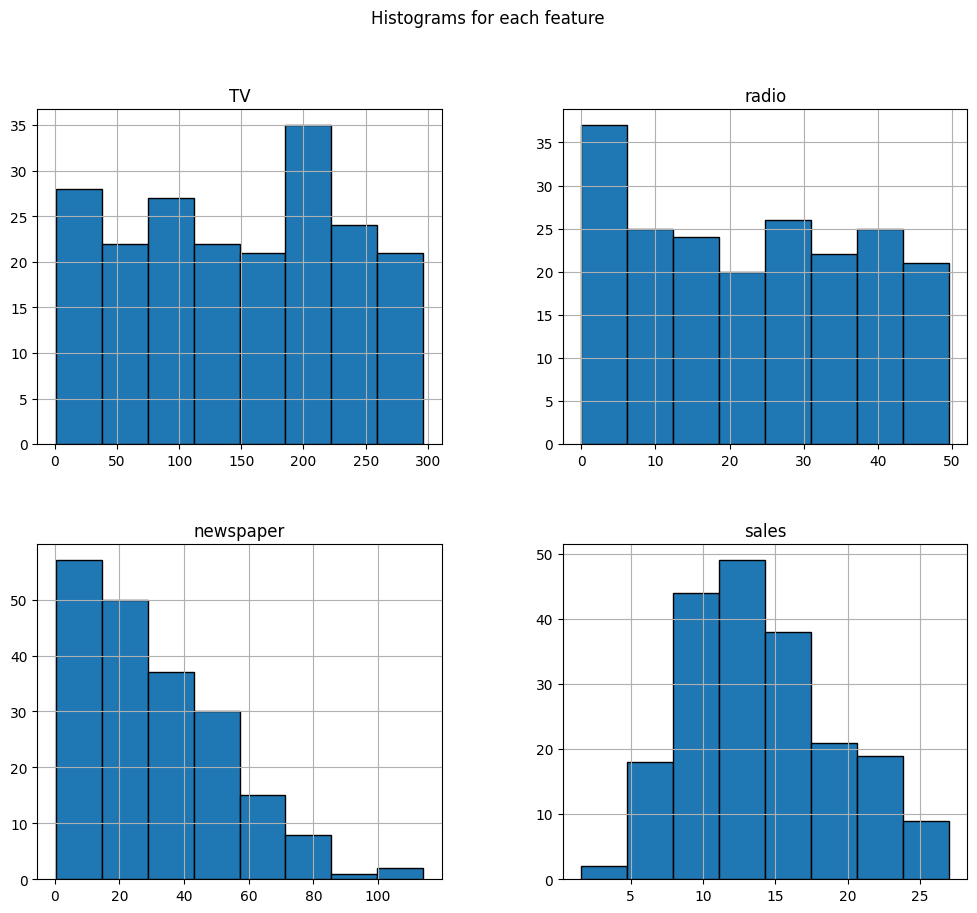

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = int(1 + np.floor(np.log2(df_regr.shape[0])))
df_regr.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature')
plt.show()

Распределение ТВ и радио похоже на равномерное с некоторыми выбросами. Это означает, что бюджет на эти каналы выделяется разный с примерно одинаковой частотой. Гистограмма для газет подтверждает положительную ассиметрию, распределение сдвинуто вправо. Это означает, что на газеты чаще расходуется меньше бюджета. Распределение продаж напоминает нормальное распределение.

Построим эмпирические функции распределения каждого признака. Напишем метод, который считает частоты сортированных данных и возвращает кортеж с индексами и соответствующими им кумулятивными вероятностями. Передаем в метод каждую колонку. Покажем график

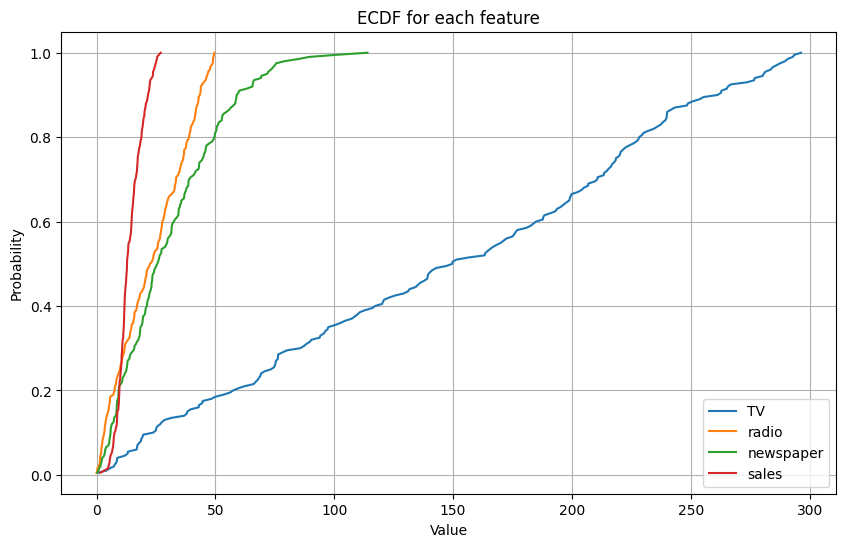

In [ ]:
def ecdf(series: pd.Series):
  sorted = series.sort_values(ignore_index=True)
  idx_prob = sorted.value_counts(normalize=True, sort=False)
  return (idx_prob.index, idx_prob.values.cumsum())

plt.figure(figsize=(10, 6))
for col in df_regr.columns:
  idx, cumsum_ = ecdf(df_regr[col])
  plt.plot(idx, cumsum_, label=col)
plt.title('ECDF for each feature')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()

Постепенное неубывание ТВ и радио подтверждает, что данные распределены более равномерно. Сдвиг графика газет вправо подтверждает положительную ассиметрию соответствующего признака. Графики ТВ и газет выглядят наиболее шумными, это может говорить о наличии выбросов. Функция распределения продаж похожа на `cdf` нормального распределения.

Построим ядерные оценки плотности каждого признака. Воспользуемся библиотекой `seaborn`. Покажем графики

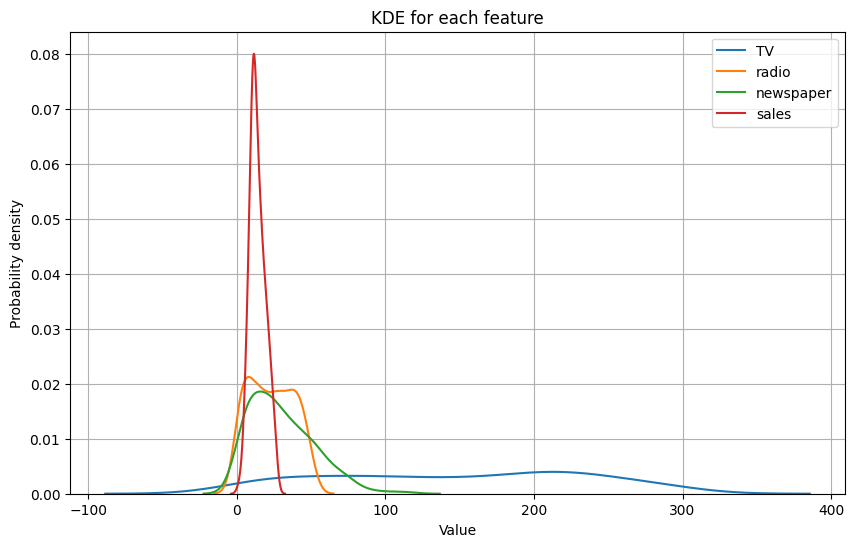

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
for col in df_regr.columns:
    sns.kdeplot(df_regr[col], label=col)
plt.title('KDE for each feature')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Графики подтверждают наши предыдущие рассуждения. Например, график для ТВ распределен равномерно и не имеет ярко выраженного пика, однако множество значений располагаются на одном уровне -- мультимодальность. График для газет смещен вправо (правый хвост длиннее, большинство значений сосредоточено слева) -- положительная ассиметрия. Радио имеет два выраженных пика (мультимодальность). График продаж имеет выраженный пик и короткие примерно симметричные хвосты, распределение стабильное, напоминает нормальное.

Построим `pairplot`. Покажем график

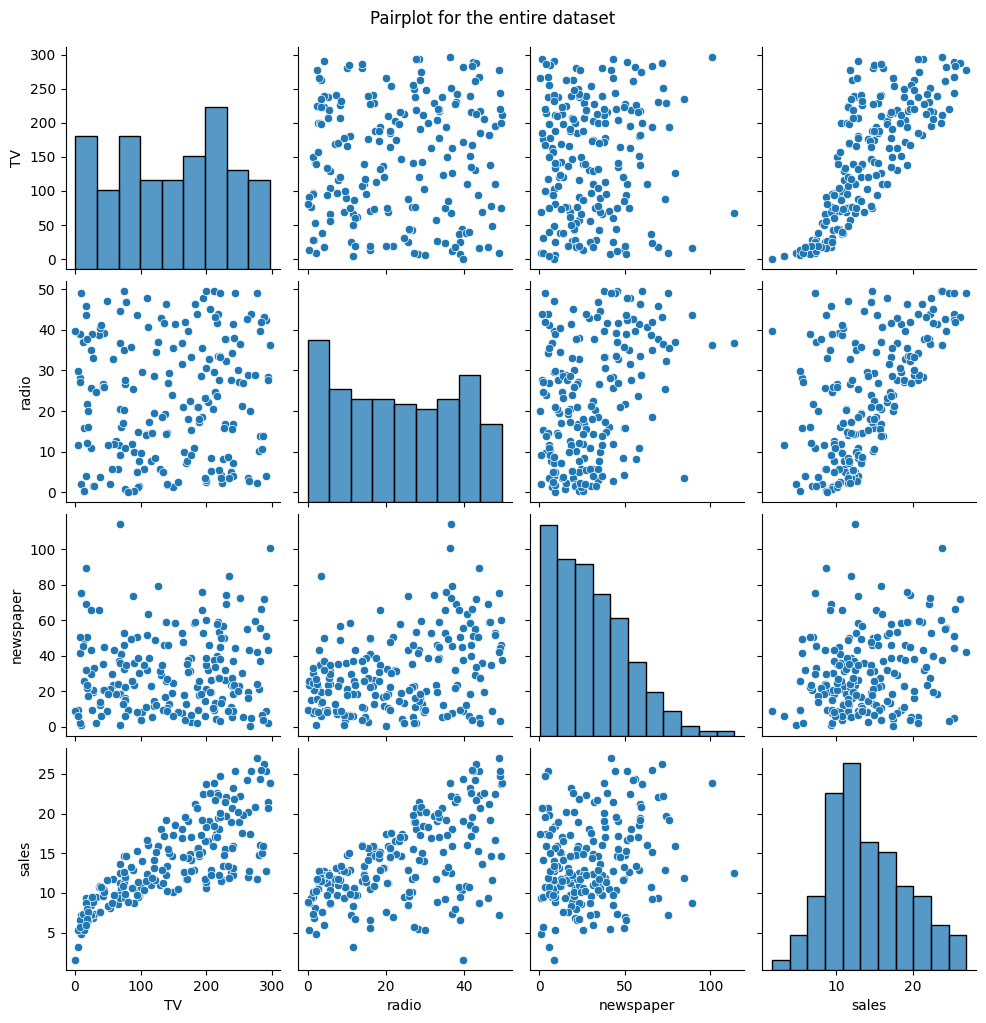

In [ ]:
import seaborn as sns

sns.pairplot(df_regr)
plt.suptitle('Pairplot for the entire dataset', y=1.02)
plt.show()

Исходя из графика можно предположить, что есть некоторая нелинейная зависимость между продажами и расходами на ТВ. Что-то похожее, но менее явное, наблюдается между радио и продажами. Газеты более хаотичные, возможно проблема в выбросах.

###Матрица корреляций, heatmap

Вычислим матрицу корреляций с помощью библиотеки `pandas`. Изобразим результат в виде тепловой карты, которую построим библиотекой `seaborn`

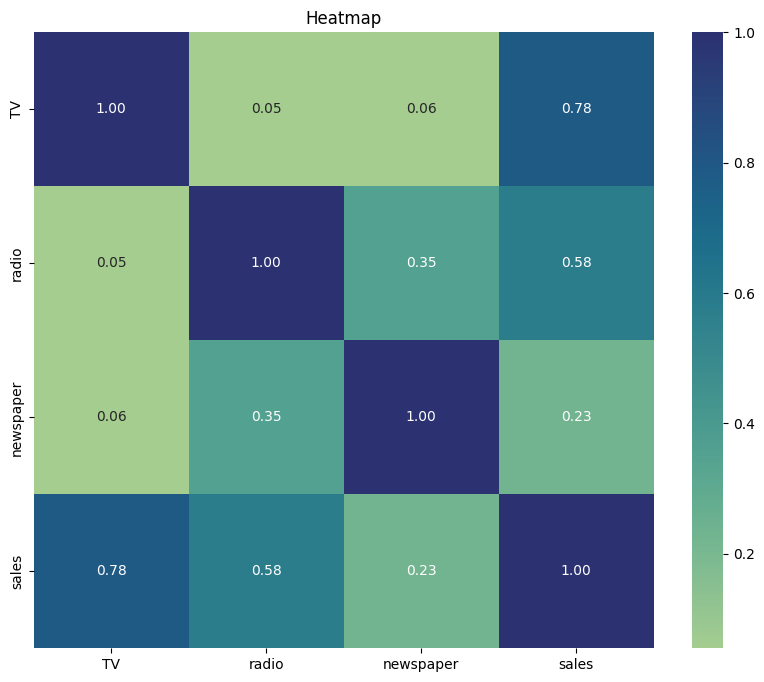

In [ ]:
regr_corr_matrix = df_regr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(regr_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap')
plt.show()

Наблюдаем значительную корреляцию между ТВ и продажами. Достаточно высокая корреляция также у радио и продаж. Газеты слабо коррелируют с продажами. Радио и газеты несколько коррелируют между собой, можно будет попробовать их объединить, чтобы попытаться получить более высокую корреляцию с продажами. Остальные признаки почти не коррелируют друг с другом. Стоит заметить, что все корреляции положительны.

##Датасет для классификации

Описание атрибутов:

1. `age` -- возраст
2. `sex` -- пол
3. `cp` -- chest pain -- тип боли в груди (4 значения)
4. `trestbps` -- resting blood pressure -- давление в состоянии покоя
5. `chol` -- уровень холестерина в крови, в mg/dl
6. `fbs` -- fasting blood sugar -- уровень сахара в крови, > 120 mg/dl
7. `restecg` -- resting electrocardiographic results -- результаты покоящей электрокардиограммы (значения 0, 1, 2)
8. `thalach` -- максимальный пульс
9. `exang` -- exercise induced angina -- наличие ангины, вызванной физическими нагрузками
10. `oldpeak` -- пиковые значения в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя
11. `slope` -- наклон пикового значения в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя
12. `ca` -- количество крупных окрашенных сосудов (от 0 до 3) при флурозопии
13. `thal` -- 3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
14. `target` -- 0 обозначает отсутствие заболевания сердца, 1 обозначает наличие заболевания сердца

Считаем в переменную датасет для классификации

In [ ]:
import pandas as pd
df_classif=pd.read_csv('drive/My Drive/heart.csv')
df_classif

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

`thal` имеет значения 1, 2, 3 вместо 3, 6, 7 -- посчитаем это удобной заменой для классификации.

###Меры центральной тенденции

Посчитаем меры центральной тенденции для классификации так же, как и для регрессии. Выведем выборочное среднее для каждой колонки

In [ ]:
df_classif_ct = central_tendency(df_classif)

classif_mean_dict = to_dict(df_classif_ct[0])
print("Mean:")
print("-" * 21)
for key, value in classif_mean_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Mean:
---------------------
age           54.3663
sex            0.6832
cp             0.9670
trestbps     131.6238
chol         246.2640
fbs            0.1485
restecg        0.5281
thalach      149.6469
exang          0.3267
oldpeak        1.0396
slope          1.3993
ca             0.7294
thal           2.3135
target         0.5446


Средний возраст пациентов -- 54 года. 68% испытуемых -- мужчины. У 54% пациентов заболевание присутствует.

Выведем медиану для каждого признака

In [ ]:
classif_median_dict = to_dict(df_classif_ct[1])
print("Median:")
print("-" * 21)
for key, value in classif_median_dict.items():
    print(f"{key:<10} {value:>10}")

Median:
---------------------
age              55.0
sex               1.0
cp                1.0
trestbps        130.0
chol            240.0
fbs               0.0
restecg           1.0
thalach         153.0
exang             0.0
oldpeak           0.8
slope             1.0
ca                0.0
thal              2.0
target            1.0


Медиана возраста почти совпала с выборочным средним -- выборка сосредоточена вокруг среднего возраста пациентов. У большей части пациентов не наблюдается ангина, вызываемая физическими нагрузками, уровень сахара не больше 120 мг/дл, `thal` не в пределах нормы. Большая часть пациентов -- мужчины. У большей части пациентов заболевание присутствует.

Выведем моду для каждого признака аналогично как таблицу

In [ ]:
classif_concat = []
for i in range(df_classif.shape[1]):
  classif_concat.append(df_classif_ct[2][i][1])
classif_mode_df = pd.concat(classif_concat, axis=1)
print("Mode:")
print("-" * 99)
classif_mode_df

Mode:
---------------------------------------------------------------------------------------------------


age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   197  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   204  NaN      NaN      NaN    NaN      NaN   
2   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    2.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN  
2    NaN  NaN   NaN     NaN

Наиболее часто встречающийся возраст в выборке составляет 58 лет. Пол -- мужской. Заболевание -- есть. Чаще всего давление в состоянии покоя у пациентов равно 120 мм. рт. ст. Также у большинства пациентов отсутствуют крупные окрашенные сосуды. Мультимодальным оказался только признак уровня холестерина в крови.

###Меры разброса

Посчитаем меры разброса для классификации. Выведем дисперсию каждого признака

In [ ]:
df_classif_disp = measure_dispersion(df_classif)

classif_var_dict = to_dict(df_classif_disp[0])
print("Variance:")
print("-" * 21)
for key, value in classif_var_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Variance:
---------------------
age           82.4846
sex            0.2172
cp             1.0651
trestbps     307.5865
chol        2686.4267
fbs            0.1269
restecg        0.2765
thalach      524.6464
exang          0.2207
oldpeak        1.3481
slope          0.3797
ca             1.0457
thal           0.3749
target         0.2488


Диапазон возраста пациентов довольно широкий. Самый большой разброс имеет признак уровня холестерина в крови. Для категориальных признаков небольшая дисперсия говорит о некотором одном доминирующем значении (см. моды).

Выведем среднеквадратичное отклонение каждого признака

In [ ]:
classif_std_dict = to_dict(df_classif_disp[1])
print("Standard error:")
print("-" * 21)
for key, value in classif_std_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Standard error:
---------------------
age            9.0821
sex            0.4660
cp             1.0321
trestbps      17.5381
chol          51.8308
fbs            0.3562
restecg        0.5259
thalach       22.9052
exang          0.4698
oldpeak        1.1611
slope          0.6162
ca             1.0226
thal           0.6123
target         0.4988


Возраст пациентов отклоняется от среднего на $\pm9$ лет. Для бинарных признаков значение, близкое к 0.5, говорит о сбалансированности соответствующего признака. Тип боли в груди имеет наибольшее отклонение по сравнению с другими категориальными признаками -- в данных присутствует разнообразие этого признака, но с некоторой доминирующей категорией.

Выведем минимальное значение каждой колонки

In [ ]:
classif_min_dict = to_dict(df_classif_disp[2])
print("Min:")
print("-" * 21)
for key, value in classif_min_dict.items():
    print(f"{key:<10} {value:>10}")

Min:
---------------------
age                29
sex                 0
cp                  0
trestbps           94
chol              126
fbs                 0
restecg             0
thalach            71
exang               0
oldpeak           0.0
slope               0
ca                  0
thal                0
target              0


В выборке присутствуют молодые люди. У некоторых испытуемых очень низкое давление, что может быть аномалией. То же самое с низким максимальным пульсом. Минимальное значение `thal` не соответствует заявленному в описании атрибутов. Если 1=3, 2=6, 3=7, то 0 не подходит ни под какую категорию, скорее всего это аномалия. Либо наоборот, 3 является неподходящим значением. Это мы узнаем из гистограммы. Остальные категориальные признаки подтверждают корректность данных.

Выведем максимальное значение каждой колонки

In [ ]:
classif_max_dict = to_dict(df_classif_disp[3])
print("Max:")
print("-" * 21)
for key, value in classif_max_dict.items():
    print(f"{key:<10} {value:>10}")

Max:
---------------------
age                77
sex                 1
cp                  3
trestbps          200
chol              564
fbs                 1
restecg             2
thalach           202
exang               1
oldpeak           6.2
slope               2
ca                  4
thal                3
target              1


Максимальный уровень холестерина довольно высокий, это может быть выброс. Максимальное значение крупных окрашенных сосудов равно 4, хотя в описании признаков указанный максимум -- 3. Скорее всего это аномалия.

Выведем межквартильный размах для каждого признака

In [ ]:
classif_iqr_dict = to_dict(df_classif_disp[4])
print("IQR:")
print("-" * 21)
for key, value in classif_iqr_dict.items():
    print(f"{key:<10} {value:>10}")

IQR:
---------------------
age              13.5
sex               1.0
cp                2.0
trestbps         20.0
chol             63.5
fbs               0.0
restecg           1.0
thalach          32.5
exang             1.0
oldpeak           1.6
slope             1.0
ca                1.0
thal              1.0
target            1.0


Центральная половина данных охватывает диапазон в 13.5 лет. Для бинарных признаков межквартильный размах, равный 1 или 0, подтверждает корректность данных. Признаки с большим межквартильным размахом указывают на разнообразие соответствующих им центральным 50% данных.

###Параметры формы распределений

Посчитаем параметры формы распределений для всех колонок. Выведем ассиметрию каждого признака

In [ ]:
df_classif_dsp = distribution_shape_parameters(df_classif)

classif_skew_dict = to_dict(df_classif_dsp[0])
print("Skew:")
print("-" * 21)
for key, value in classif_skew_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Skew:
---------------------
age           -0.2025
sex           -0.7913
cp             0.4847
trestbps       0.7138
chol           1.1434
fbs            1.9867
restecg        0.1625
thalach       -0.5374
exang          0.7425
oldpeak        1.2697
slope         -0.5083
ca             1.3104
thal          -0.4767
target        -0.1798


У возраста небольшая отрицательная ассиметрия (смещение влево, правый хвост короче). Пол имеет значительную отрицательную ассиметрию, что подтверждает доминирование одного значения в данных (как выяснили ранее, перевес в сторону мужчин; на графике большая часть информации будет сосредоточена справа). Тип боли в груди смещен вправо -- распределение ассиметрично в сторону меньших значений. Электрокардиограмма в покое имеет близкое к симметричному распределение. У уровня холестерина значительная положительная ассиметрия, скорее всего этот признак содержит выбросы, так как большая часть данных сосредоточена слева, то есть там, где уровень холестерина ниже, но при этом существует длинный правый хвост, где ур. хол. выше. Такая же ситуация с пиковыми значениями на ЭКГ и количеством крупных окрашенных сосудов.

Выведем эксцесс каждой колонки

In [ ]:
classif_kurt_dict = to_dict(df_classif_dsp[1])
print("Kurt:")
print("-" * 21)
for key, value in classif_kurt_dict.items():
    print(f"{key:<10} {value:>10.4f}")

Kurt:
---------------------
age           -0.5422
sex           -1.3830
cp            -1.1931
trestbps       0.9291
chol           4.5054
fbs            1.9597
restecg       -1.3627
thalach       -0.0620
exang         -1.4583
oldpeak        1.5758
slope         -0.6275
ca             0.8393
thal           0.2979
target        -1.9808


Только максимальный пульс ближе всего к нормальному распределению, так как значение его эксцесса близко к 0. У признаков с отрицательным значением эксцесса распределение более низкое и пологое (концентрация вокруг среднего значения низкая). С положительным -- более острое (данные сконцентрированы вокруг среднего значения). Чем больше значение по модулю, тем аномальнее высота пика.

###Гистограммы, ECDF, KDE, pairplot

Построим гистограммы каждого признака аналогично предыдущему разу

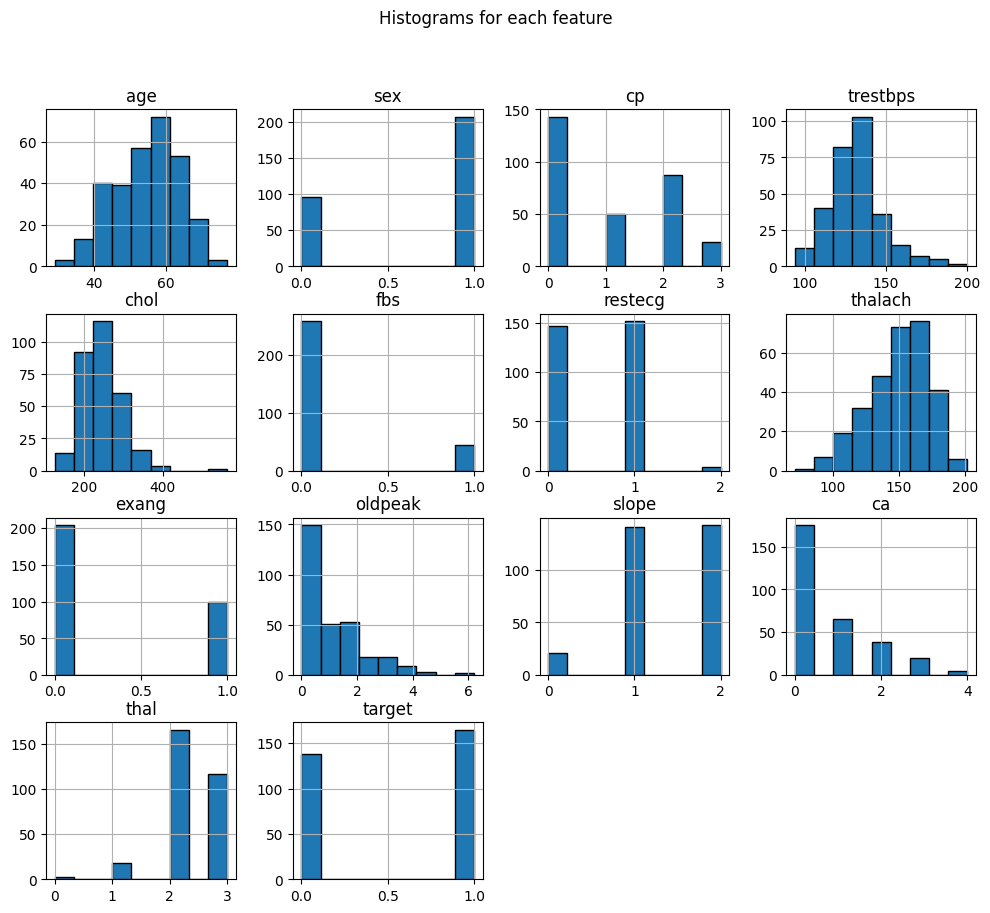

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = int(1 + np.floor(np.log2(df_classif.shape[0])))
df_classif.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature')
plt.show()

Наблюдаем левосторонний хвост у признака `age`. Значительно менее явно он выражен у `thalach`. `trestbps`, `oldpeak` и `chol` имеют правосторонний хвост, при этом у последнего заметен очевидный выброс (маленький столбец справа). Из гистограммы `thal` делаем вывод -- 0 является аномальным значением, остальные заменяют указанные в описании атрибутов числа. Так же наблюдаем аномальное значение 4 на гистограмме `ca`. В остальном графики соответствуют исследованным ранее значениям.

Построим эмпирические функции распределения каждого признака

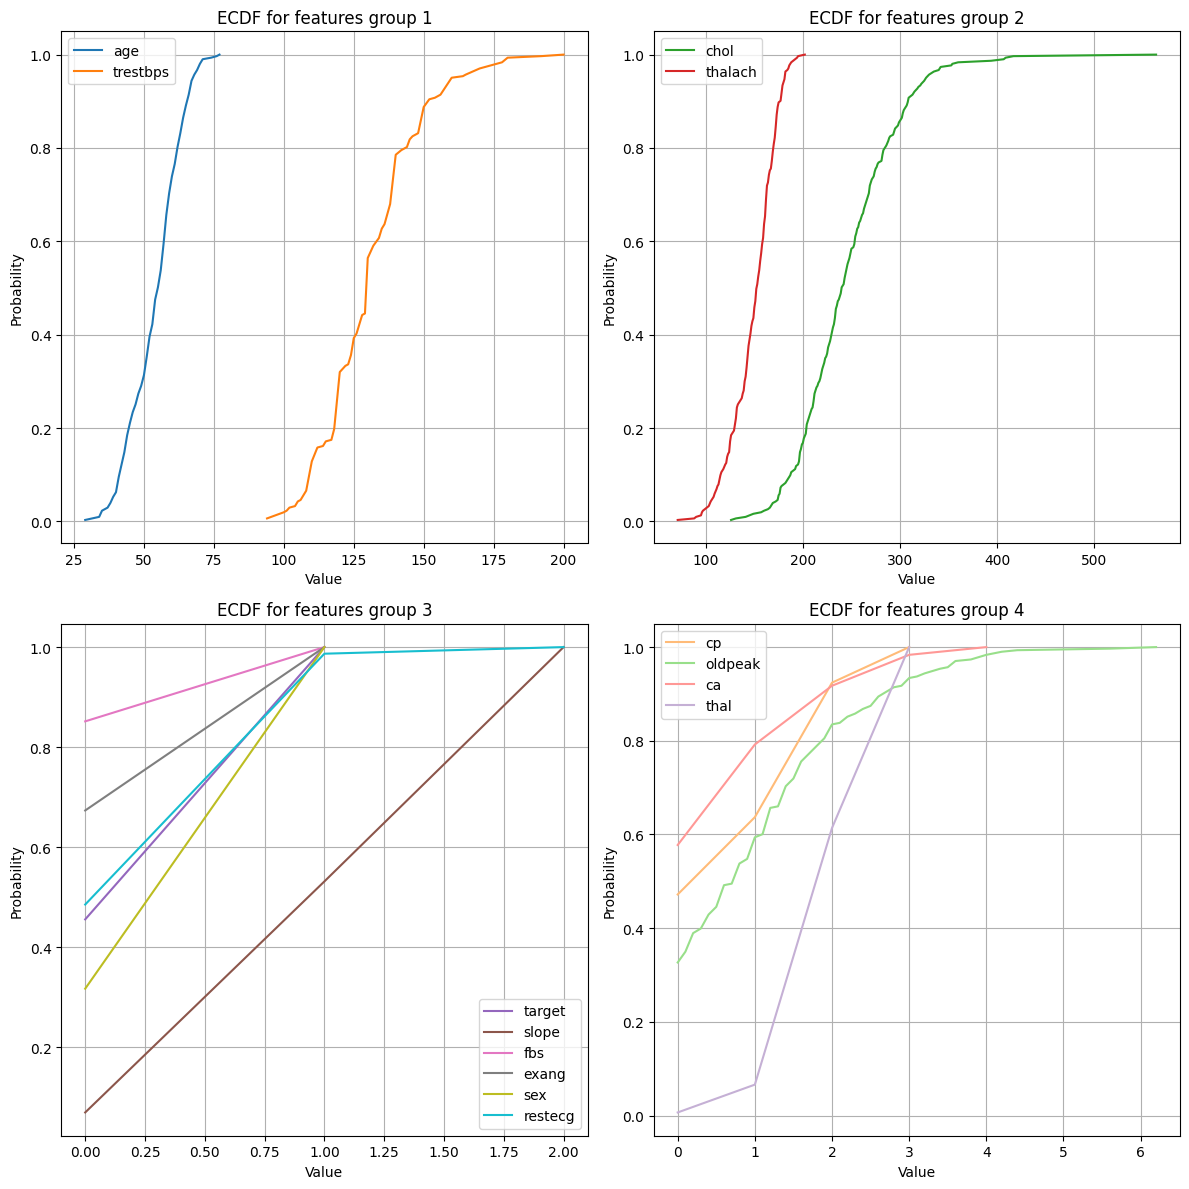

In [ ]:
groups = [['age', 'trestbps'],
          ['chol', 'thalach'],
          ['target', 'slope', 'fbs', 'exang', 'sex', 'restecg'],
          ['cp', 'oldpeak', 'ca', 'thal']]
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf',  # Cyan
    '#ffbb78',  # Light orange
    '#98df8a',  # Light green
    '#ff9896',  # Light red
    '#c5b0d5'   # Light purple
]

plt.figure(figsize=(12, 12))
c = 0
for i in range(len(groups)):
  plt.subplot(2, 2, i + 1)
  for col in groups[i]:
      idx, cumsum_ = ecdf(df_classif[col])
      plt.plot(idx, cumsum_, label=col, color=colors[c])
      c += 1
  plt.title(f'ECDF for features group {i + 1}')
  plt.xlabel('Value')
  plt.ylabel('Probability')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Возраст распределен относительно равномерно. `trestbps` достаточно шумный, концентрируется слева с более редкими значениями справа (то есть для большинства пациентов давление либо в норме, либо низкое). Холестерин имеет длинный правый хвост, что может указывать на наличие выбросов (почти все данные слева, но какие-то редкие справа создают такой хвост). График максимального пульса смещен влево, это означает, что есть пациенты с достаточно низким пульсом, но большая часть сосредоточена правее (пульс выше). Категориальные признаки ожидаемо скачкообразные, данные распределены с перекосом в одну из категорий. `oldpeak` содержит длинный правый хвост, то есть редкие высокие значения.

Построим ядерные оценки плотности каждого признака

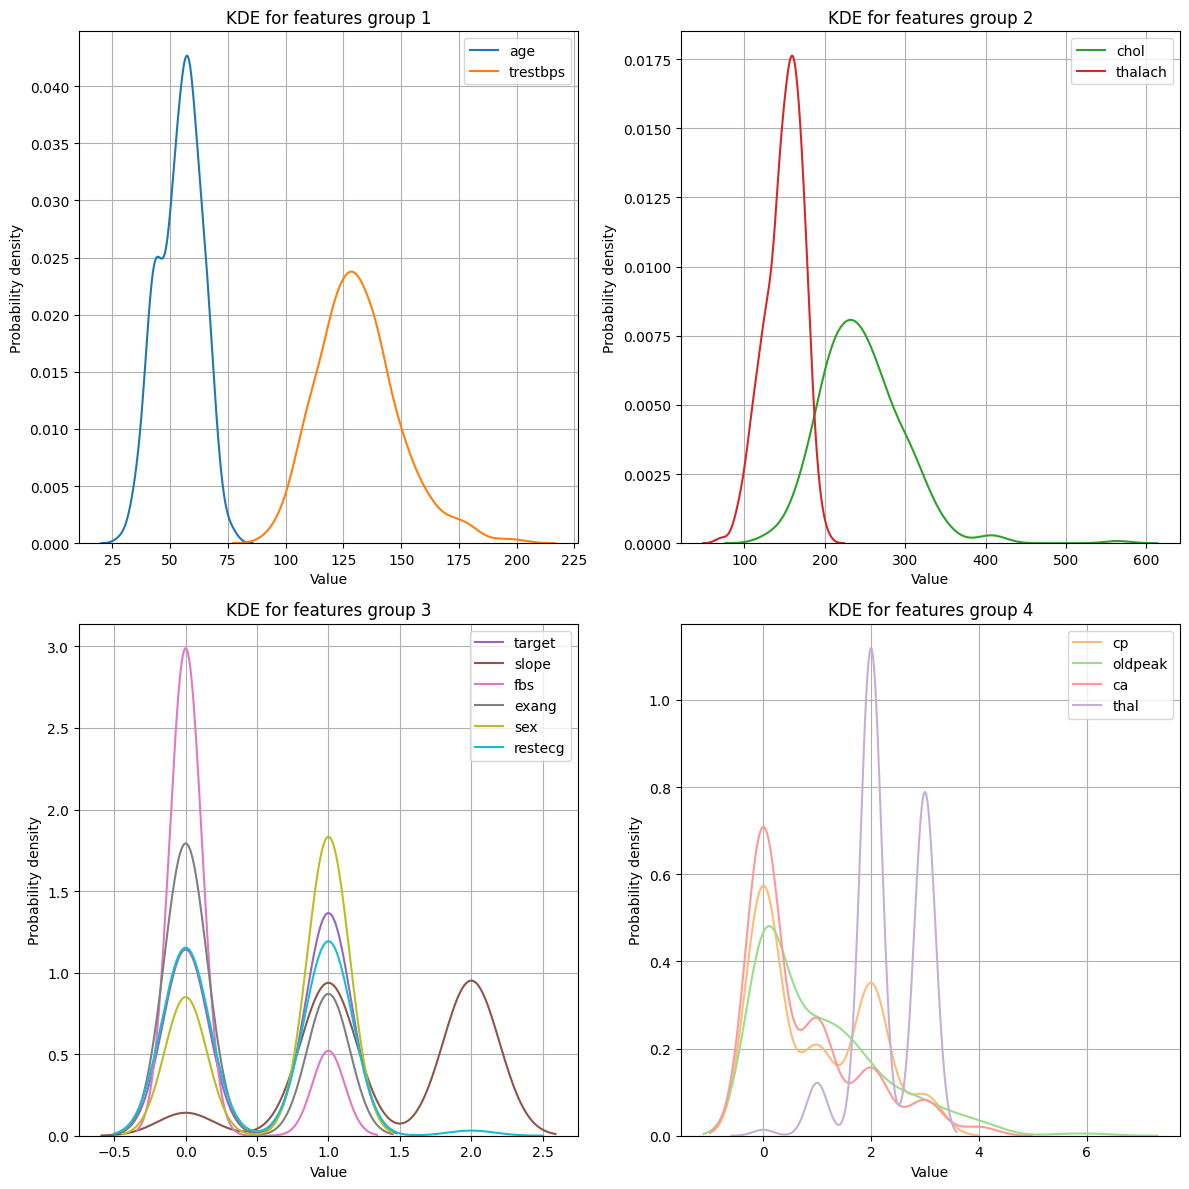

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 12))
c = 0
for i in range(len(groups)):
  plt.subplot(2, 2, i + 1)
  for col in groups[i]:
      sns.kdeplot(df_classif[col], label=col, color=colors[c])
      c += 1
  plt.title(f'KDE for features group {i + 1}')
  plt.xlabel('Value')
  plt.ylabel('Probability density')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Рассуждения про хвосты аналогичны. Каждый признак имеет выраженный пик или несколько пиков. Непрерывные признаки преимущественно имеют один пик (см. `age`, `trestbps`, `chol`, `thalach`, `oldpeak`). По пикам графиков категориальных признаков видно, что некоторые категории перевешивают другие (см. `fbs`, `slope`).

Построим `pairplot`. Покажем график

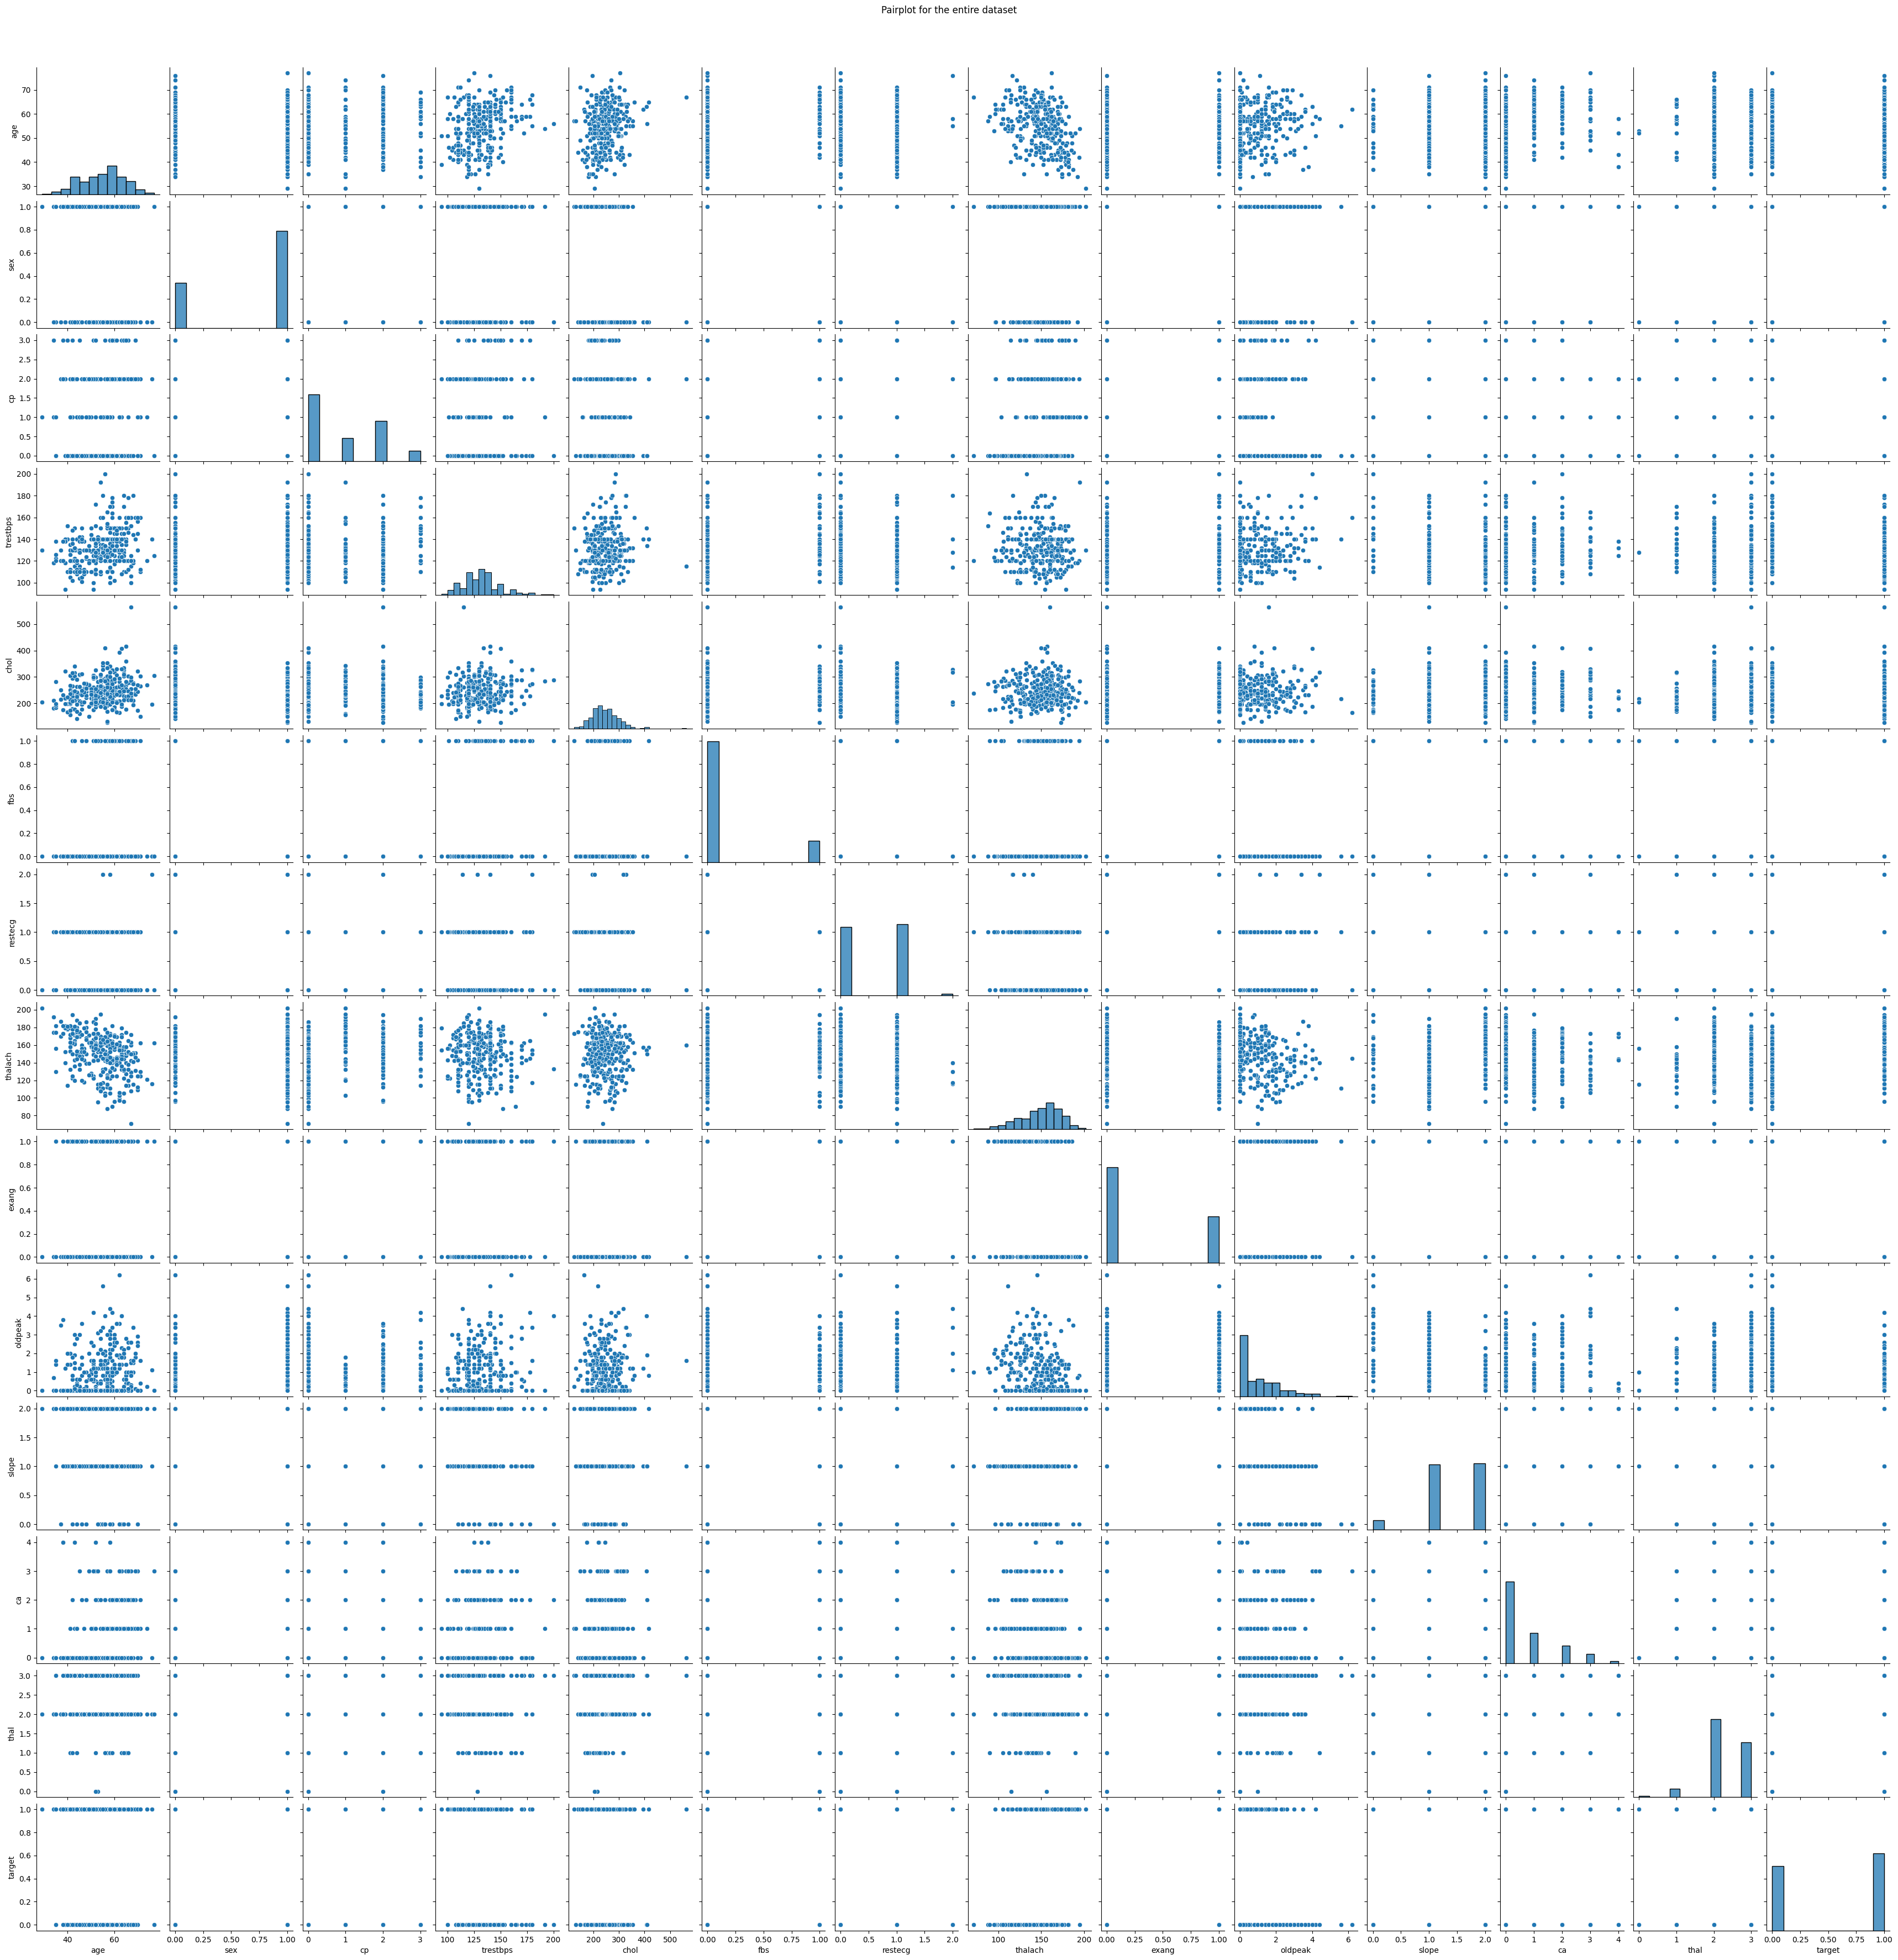

In [ ]:
import seaborn as sns

sns.pairplot(df_classif)
plt.suptitle('Pairplot for the entire dataset', y=1.02)
plt.show()

Похоже, что существует некоторая отрицательная корреляция между `thalach` и `age` (точки на графике пересечения снижаются, см. график 8x1). Выделить какие-то другие связи трудно.

###Матрица корреляций, heatmap

Вычислим матрицу корреляций, изобразим результат тепловой картой

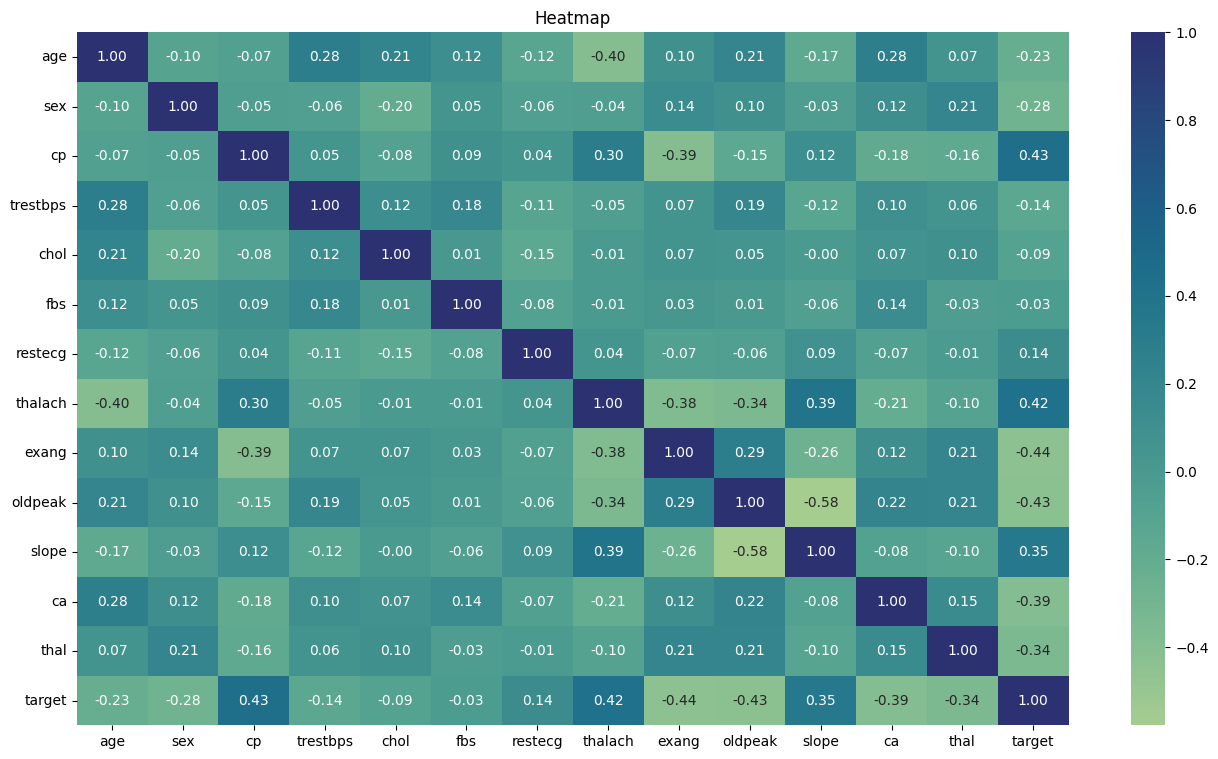

In [ ]:
classif_corr_matrix = df_classif.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(classif_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap')
plt.show()

Наблюдаем неплохую корреляцию по модулю между признаками `cp`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal` и целевой переменной `target`. `thalach` имеет отрицательную корреляцию с `age`. Самая высокая корреляция по модулю между признаками `oldpeak` и `slope`. Видим, что `chol` и `fbs` слабо коррелируют как с целевой переменной, так и с другими признаками.

#Исследование датасетов

##Датасет для регрессии

Для начала проверим, нет ли в колонках отсутствующих данных. Напишем метод, который переберет все признаки в таблице и выведет список всех столбцов с NaN и их общее количество. Передадим в метод датасет для регрессии

In [ ]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            sum = data[feature].isna().sum()
            type = data[feature].dtype
            print(f'{feature}: {sum}, type: {type}')
            list.append(feature)
    print(list)
    print(len(list))

missing_value_checker(df_regr)

[]
0


Пропущенных данных в датасете нет.

###Извлечение новых признаков

Извлечем признаки из датасета. Добавим сочетания признаков, чтобы (предполагаемой будущей) модели, обучающейся на нашем датасете, было проще учитывать взаимодействие между переменными:
1. `TV_radio` -- одновременно реклама на ТВ и на радио
2. `TV_newspaper` -- одновременно реклама на ТВ и в газетах
3. `radio_newspaper` -- одновременно реклама на радио и в газетах
4. `TV_radio_newspaper` -- одновременно реклама на всех каналах

Также добавим общий бюджет на рекламу и доли расходов на каждый канал от него:
5. `total_ad_budget` -- общие затраты на рекламу на все каналы
6. `TV_share` -- доля затрат на ТВ от общего бюджета
7. `radio_share` -- доля затрат на радил от общего бюджета
8. `newspaper_share` -- доля затрат на газеты от общего бюджета

Выведем обновленный датасет

In [ ]:
new_df_regr = df_regr.copy().drop(['sales'], axis=1)

new_df_regr['TV_radio'] = new_df_regr['TV'] * new_df_regr['radio']
new_df_regr['TV_newspaper'] = new_df_regr['TV'] * new_df_regr['newspaper']
new_df_regr['radio_newspaper'] = new_df_regr['radio'] *\
                                 new_df_regr['newspaper']
new_df_regr['TV_radio_newspaper'] = new_df_regr['TV'] *\
                                    new_df_regr['radio'] *\
                                    new_df_regr['newspaper']

new_df_regr['total_ad_budget'] = new_df_regr['TV'] +\
                                 new_df_regr['radio'] +\
                                 new_df_regr['newspaper']
new_df_regr['TV_share'] = new_df_regr['TV'] / new_df_regr['total_ad_budget']
new_df_regr['radio_share'] = new_df_regr['radio'] /\
                             new_df_regr['total_ad_budget']
new_df_regr['newspaper_share'] = new_df_regr['newspaper'] /\
                                 new_df_regr['total_ad_budget']
new_df_regr['sales'] = df_regr['sales']

new_df_regr

TV  radio  newspaper  TV_radio  TV_newspaper  radio_newspaper  \
0    230.1   37.8       69.2   8697.78      15922.92          2615.76   
1     44.5   39.3       45.1   1748.85       2006.95          1772.43   
2     17.2   45.9       69.3    789.48       1191.96          3180.87   
3    151.5   41.3       58.5   6256.95       8862.75          2416.05   
4    180.8   10.8       58.4   1952.64      10558.72           630.72   
..     ...    ...        ...       ...           ...              ...   
195   38.2    3.7       13.8    141.34        527.16            51.06   
196   94.2    4.9        8.1    461.58        763.02            39.69   
197  177.0    9.3        6.4   1646.10       1132.80            59.52   
198  283.6   42.0       66.2  11911.20      18774.32          2780.40   
199  232.1    8.6        8.7   1996.06       2019.27            74.82   

     TV_radio_newspaper  total_ad_budget  TV_share  radio_share  \
0            601886.376            337.1  0.682587     0.112133   
1             78873.135            128.9  0.345229     0.304888   
2             54710.964            132.4  0.129909     0.346677   
3            366031.575            251.3  0.602865     0.164345   
4            114034.176            250.0  0.723200     0.043200   
..                  ...              ...       ...          ...   
195            1950.492             55.7  0.685817     0.066427   
196            3738.798            107.2  0.878731     0.045709   
197           10535.040            192.7  0.918526     0.048262   
198          788521.440            391.8  0.723839     0.107198   
199           17365.722            249.4  0.930634     0.034483   

     newspaper_share  sales  
0           0.205280   22.1  
1           0.349884   10.4  
2           0.523414    9.3  
3           0.232789   18.5  
4           0.233600   12.9  
..               ...    ...  
195         0.247756    7.6  
196         0.075560    9.7  
197         0.033212   12.8  
198         0.168964   25.5  
199         0.034884   13.4  

[200 rows x 12 columns]

Посчитаем матрицу корреляций от обновленного датасета. Цель -- сразу отбросить признаки, которые почти не коррелируют с целевой переменной, либо удалить один из сильно коррелирующих между собой признаков. Выведем тепловую карту

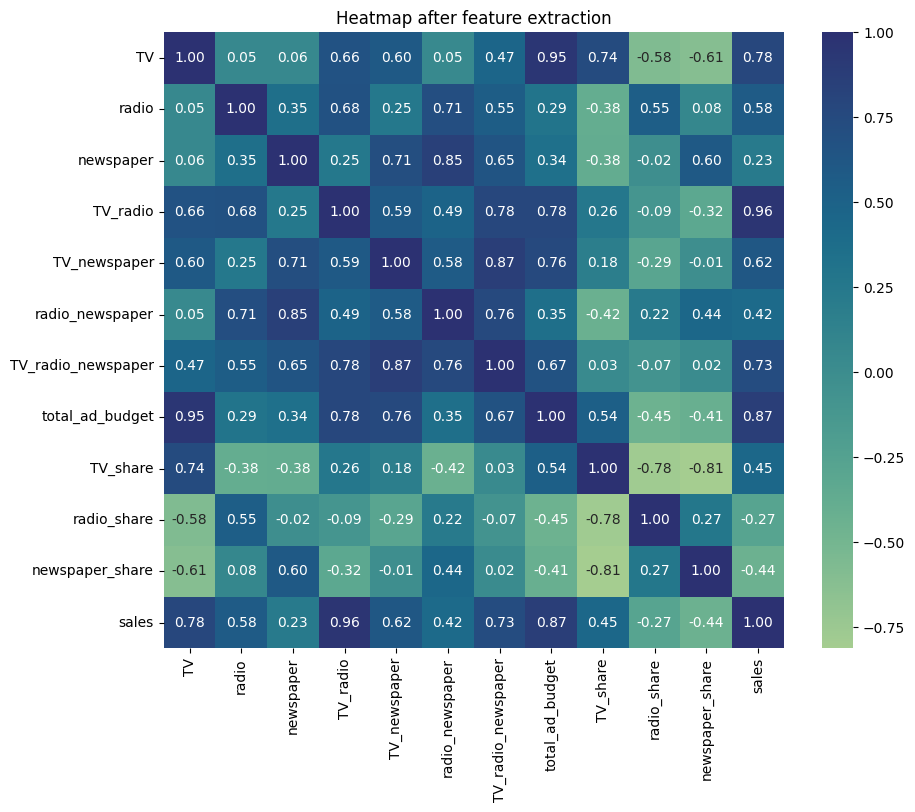

In [ ]:
new_regr_corr_matrix = new_df_regr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(new_regr_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after feature extraction')
plt.show()

Зададим порог корреляции между признаками в 0.8 единиц. Если два или более признаков коррелируют между собой больше, чем на порог, то оставляем только один, который лучше коррелирует с целевой переменной. В данном случае наивысший приоритет получает сочетание `TV_radio`, так как оно коррелирует с целевой переменной на 0.96 единиц. Несмотря на высокую корреляцию `total_ad_budget` и `sales`, этот признак лучше удалить, так как он сильно коррелирует с `TV` и `TV_radio`. `radio_share` не вносит значительного вклада в датасет вследствие низкой корреляции с целевой переменной, а больше признаков не равно лучше, поэтому тоже удаляем. `TV_share` следует исключить, так как признак имеет сильную отрицательную корреляцию выше порога по модулю с `newspaper_share`, при этом сильно коррелируя с `TV`. `TV_newspaper` сильно коррелирует с `TV_radio_newspaper`, при этом меньше коррелируя с целевой переменной -- удаляем. `radio_newspaper` сильно коррелирует с `newspaper` и `TV_radio_newspaper` -- удаляем в пользу оригинального признака. `newspaper_share` неплохо коррелирует с целевой переменной, сильно больших корреляций с другими признаками нет. Итого из новых признаков на дальнейшее рассмотрение остались `TV_radio`, `TV_radio_newspaper` и `newspaper_share`. Выведем датасет с новыми признаками

In [ ]:
new_df_regr = new_df_regr.drop(
    ['TV_newspaper', 'radio_newspaper',
     'total_ad_budget', 'TV_share',
     'radio_share'],
    axis=1)
new_df_regr

TV  radio  newspaper  TV_radio  TV_radio_newspaper  newspaper_share  \
0    230.1   37.8       69.2   8697.78          601886.376         0.205280   
1     44.5   39.3       45.1   1748.85           78873.135         0.349884   
2     17.2   45.9       69.3    789.48           54710.964         0.523414   
3    151.5   41.3       58.5   6256.95          366031.575         0.232789   
4    180.8   10.8       58.4   1952.64          114034.176         0.233600   
..     ...    ...        ...       ...                 ...              ...   
195   38.2    3.7       13.8    141.34            1950.492         0.247756   
196   94.2    4.9        8.1    461.58            3738.798         0.075560   
197  177.0    9.3        6.4   1646.10           10535.040         0.033212   
198  283.6   42.0       66.2  11911.20          788521.440         0.168964   
199  232.1    8.6        8.7   1996.06           17365.722         0.034884   

     sales  
0     22.1  
1     10.4  
2      9.3  
3     18.5  
4     12.9  
..     ...  
195    7.6  
196    9.7  
197   12.8  
198   25.5  
199   13.4  

[200 rows x 7 columns]

###Преобразование признаков

Вспомним, что бюджет на ТВ имеет намного большие значения, чем бюджет на другие каналы. Это помешает (предполагаемой будущей) модели хорошо обучаться. Применим сначала логарифмическое $\ln{(x+1)}$ преобразование, чтобы сгладить большие значения ТВ. После применим стандартизацию (z-scaling), чтобы среднее значение каждого признака стало равно нулю, а стандартное отклонение единице. Выведем преобразованный датасет

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['TV', 'radio', 'newspaper',
            'TV_radio', 'TV_radio_newspaper', 'newspaper_share']
new_df_regr_log = np.log1p(new_df_regr[features])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df_regr_log)
df_regr_scaled = pd.DataFrame(scaled_features, columns=features)

df_regr_scaled['sales'] = new_df_regr['sales']
df_regr_scaled

TV     radio  newspaper  TV_radio  TV_radio_newspaper  \
0    0.781107  0.850789   1.270548  1.063191            1.398242   
1   -0.911701  0.892779   0.784008  0.018653            0.385890   
2   -1.866146  1.060674   1.272195 -0.498938            0.203681   
3    0.348112  0.946397   1.079221  0.848682            1.150487   
4    0.531172 -0.466897   1.077274  0.090408            0.569535   
..        ...       ...        ...       ...                 ...   
195 -1.066943 -1.485932  -0.530505 -1.615626           -1.456900   
196 -0.142693 -1.234212  -1.093193 -0.847945           -1.132884   
197  0.509169 -0.617400  -1.332444 -0.020763           -0.616914   
198  0.998012  0.964567   1.220018  1.267962            1.532788   
199  0.790083 -0.695312  -1.019319  0.104726           -0.367961   

     newspaper_share  sales  
0           0.256611   22.1  
1           1.266092   10.4  
2           2.343544    9.3  
3           0.457670   18.5  
4           0.463526   12.9  
..               ...    ...  
195         0.565180    7.6  
196        -0.757902    9.7  
197        -1.115777   12.8  
198        -0.015965   25.5  
199        -1.101376   13.4  

[200 rows x 7 columns]

Посмотрим как изменились распределения признаков. Построим гистограмму, покажем график

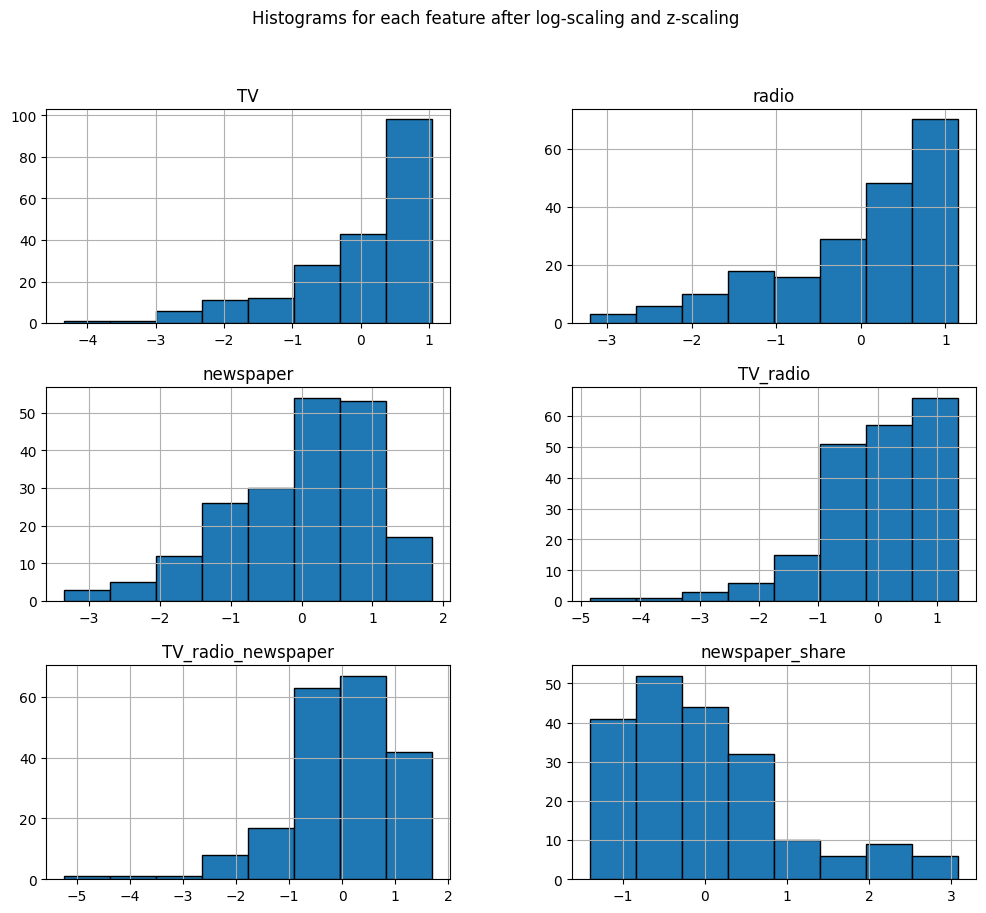

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_regr_scaled_copy = df_regr_scaled.copy().drop(['sales'], axis=1)
k = int(1 + np.floor(np.log2(df_regr_scaled_copy.shape[0])))
df_regr_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after log-scaling and z-scaling')
plt.show()

`newspaper_share` имеет правосторонний хвост. Остальные распределения сместились вправо и имеют левосторонний хвост. У признаков `TV`, `TV_radio` и `TV_radio_newspaper` есть значения в конце хвоста, похожие на выбросы.

Построим ядерные оценки плотности каждого признака. Покажем график

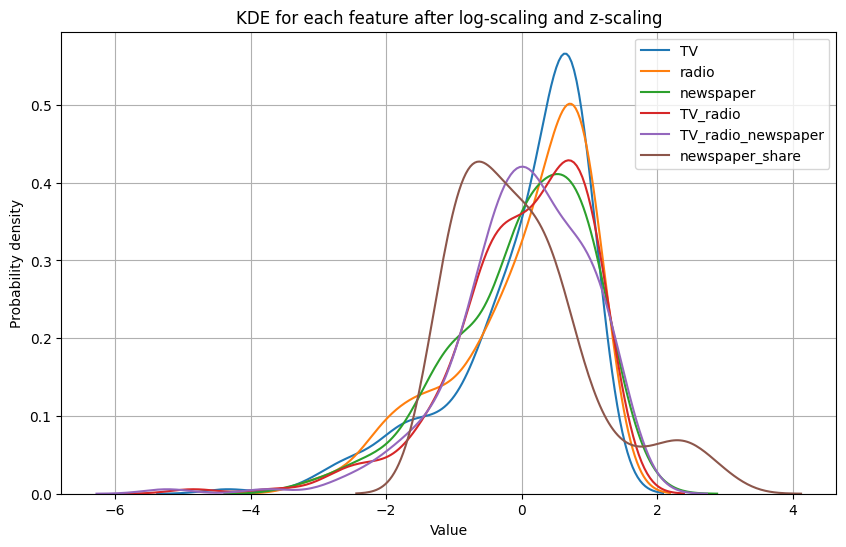

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['TV', 'radio', 'newspaper',
                'TV_radio', 'TV_radio_newspaper', 'newspaper_share']:
    sns.kdeplot(df_regr_scaled[feature], label=feature)
plt.title("KDE for each feature after log-scaling and z-scaling")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Распределения каждого признака стали больше похожи на нормальные (появились пики, вокруг которых сосредоточены данные), особенно это заметно для `TV` и `radio` (см. KDE в первичном стат. анализе), однако с такими хвостами их нельзя назвать нормальными. Также распределения находятся примерно в одном месте в одинаковом диапазоне значений (приведены к единому масштабу), что упростит обучение (предполагаемой будущей) модели (признаки имеют примерно равный вклад в модель).

Посчитаем матрицу корреляций, выведем тепловую карту

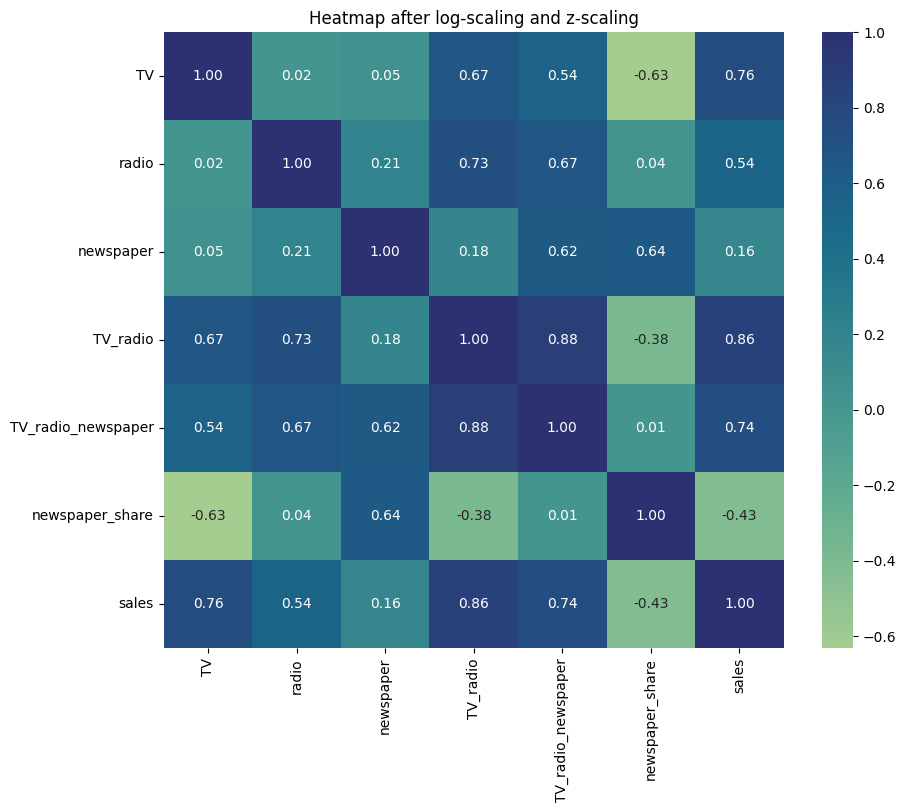

In [ ]:
regr_scaled_corr_matrix = df_regr_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(regr_scaled_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after log-scaling and z-scaling')
plt.show()

Видим, что после преобразований некоторые признаки стали больше коррелировать друг с другом. При отборе признаков этот момент нужно учесть.

###Отбор признаков и объектов

Найдем выбросы. Напишем метод, который будет в каждой колонке в каждой строке проверять, попадает ли значение в "ящик с усами". Для этого значение должно быть в диапазоне $Q_1-1.5\cdot IQR\leq a\leq Q_3+1.5\cdot IQR$. Все значения, не попавшие в этот диапазон -- выбросы. Для начала просто выведем количество выбросов в каждой колонке и построим график "ящик с усами", где полыми точками будут обозначены выбросы

Outliers count:
------------------------
TV                    11
radio                  3
newspaper              3
TV_radio               5
TV_radio_newspaper     5
newspaper_share       12
dtype: int64


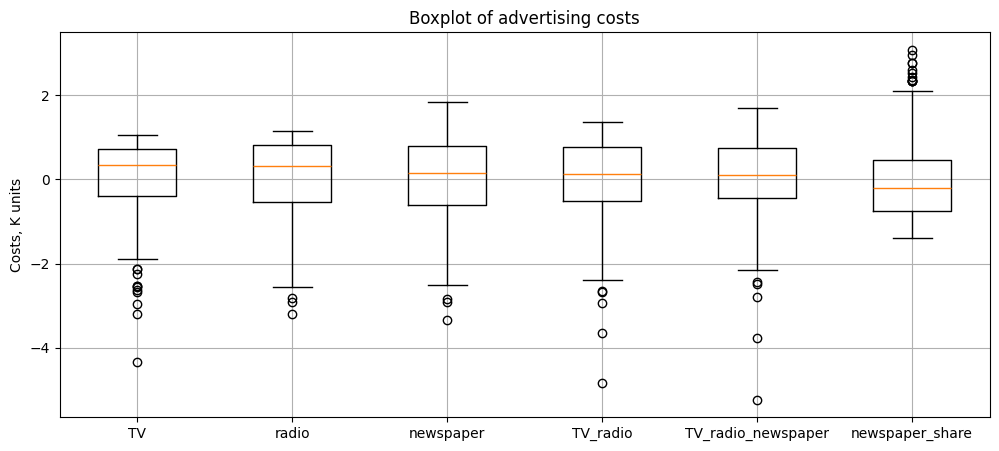

In [ ]:
def find_outliers(dataset: pd.DataFrame):
  features = dataset.columns
  Q1 = dataset[features].quantile(0.25)
  Q3 = dataset[features].quantile(0.75)
  IQR = Q3 - Q1

  outliers = ((dataset[features] < (Q1 - 1.5 * IQR)) |
              (dataset[features] > (Q3 + 1.5 * IQR)))
  return outliers

df_regr_scaled_copy = df_regr_scaled.copy().drop(['sales'], axis=1)
print("Outliers count:\n" + "-" * 24 +\
      f'\n{find_outliers(df_regr_scaled_copy).sum()}')

plt.figure(figsize=(12, 5))
plt.boxplot([df_regr_scaled_copy[col].values \
             for col in df_regr_scaled_copy.columns],
             tick_labels=df_regr_scaled_copy.columns)
plt.title('Boxplot of advertising costs')
plt.ylabel('Costs, K units')
plt.grid()
plt.show()

Больше всего выбросов в `TV` и `newspaper_share`, при чем только в последнем значения выходят за $Q_3+1.5\cdot IQR$.

Посчитаем количество аномалий методом z-score. Этот способ измеряет, насколько далеко в стандартных отклонениях исследуемое значение находится от среднего по столбцу. Аномальные значение -- такие значения, z-score по модулю которых превышает число 3 (выход значения за 99.7% всех данных; правило трех сигм). Выведем таблицу со строками, в которых обнаружены аномальные значения, а также общее число аномалий

In [ ]:
from scipy.stats import zscore

features = ['TV', 'radio', 'newspaper',
            'TV_radio', 'TV_radio_newspaper', 'newspaper_share']
z_scores = df_regr_scaled_copy[features].apply(zscore)
anomalies = (z_scores.abs() > 3).any(axis=1)
print(f"Anomalies count: {anomalies.sum()}\n" + '-' * 82)
df_regr_scaled_copy[anomalies]

Anomalies count: 6
----------------------------------------------------------------------------------


TV     radio  newspaper  TV_radio  TV_radio_newspaper  \
8   -2.532440 -1.946622  -2.846124 -2.925246           -3.762721   
33   0.929956  0.171204  -3.344520  0.742059           -1.557512   
108 -2.132021 -2.826610   0.147798 -3.652550           -2.786968   
127 -0.308381 -3.199086  -0.961169 -4.845157           -5.231068   
130 -4.335658  0.900989  -1.019319 -2.658191           -2.496409   
155 -3.191300 -0.394281  -1.447413 -2.316098           -2.438362   

     newspaper_share  
8          -0.676186  
33         -1.397524  
108         3.080211  
127        -0.534195  
130         0.049244  
155         0.697004

Всего 6 аномалий. Возможно какие-то из них ранее были распознаны как выбросы.

Попробуем применить винсоризацию -- все значения, большие $Q_3+1.5\cdot IQR$, станут равны этой границе. Аналогично для значений ниже границы $Q_1-1.5\cdot IQR$. Для этого напишем простой метод. Выведем результаты и "ящик с усами"

Outliers count after winsorization:
-----------------------
TV                    0
radio                 0
newspaper             0
TV_radio              0
TV_radio_newspaper    0
newspaper_share       0
dtype: int64
-----------------------
Anomalies count after winsorization: 0


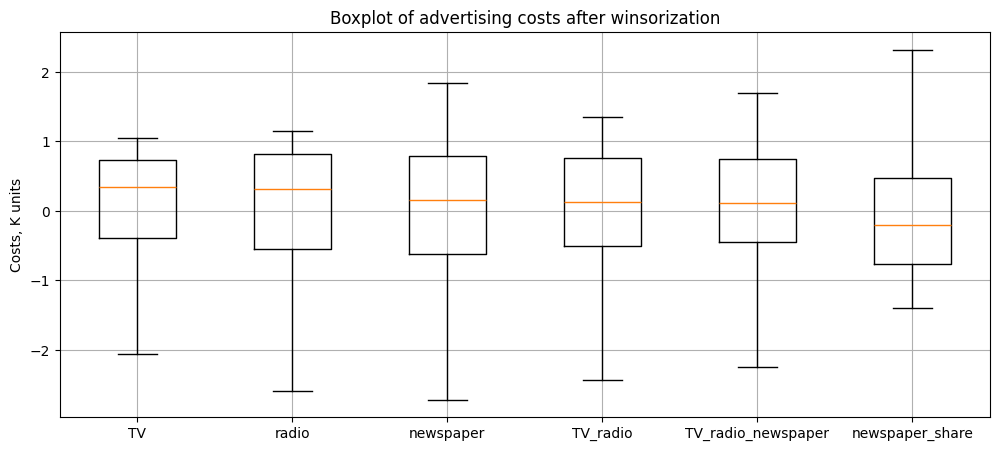

In [ ]:
def winsorization(dataset: pd.DataFrame):
  for feature in dataset.columns:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[feature] = dataset[feature].clip(lower=lower_bound,\
                                             upper=upper_bound)
  return dataset

df_regr_win_scaled_copy = df_regr_scaled.copy().drop(['sales'], axis=1)
df_regr_win_scaled_copy = winsorization(df_regr_win_scaled_copy)
print("Outliers count after winsorization:\n" + "-" * 23 +\
      f'\n{find_outliers(df_regr_win_scaled_copy).sum()}')

features = ['TV', 'radio', 'newspaper',
            'TV_radio', 'TV_radio_newspaper', 'newspaper_share']
win_z_scores = df_regr_win_scaled_copy[features].apply(zscore)
win_anomalies = (win_z_scores.abs() > 3).any(axis=1)
print("-" * 23 +\
      f"\nAnomalies count after winsorization: {win_anomalies.sum()}")

plt.figure(figsize=(12, 5))
plt.boxplot([df_regr_win_scaled_copy[col].values \
             for col in df_regr_win_scaled_copy.columns],
             tick_labels=df_regr_win_scaled_copy.columns)
plt.title('Boxplot of advertising costs after winsorization')
plt.ylabel('Costs, K units')
plt.grid()
plt.show()

Теперь выбросы отсутствуют. На самом деле избавление от всех выбросов (винсоризация, удаление) может негативно повлиять на обучение модели. Однако это можно проверить, непосредственно обучая модель на датасетах с разной обработкой выбросов. Поэтому сейчас мы просто убрали все выбросы.

Вычислим матрицу корреляций и построим тепловую карту. Нужно обработать сильно коррелирующие признаки. Выведем рисунок

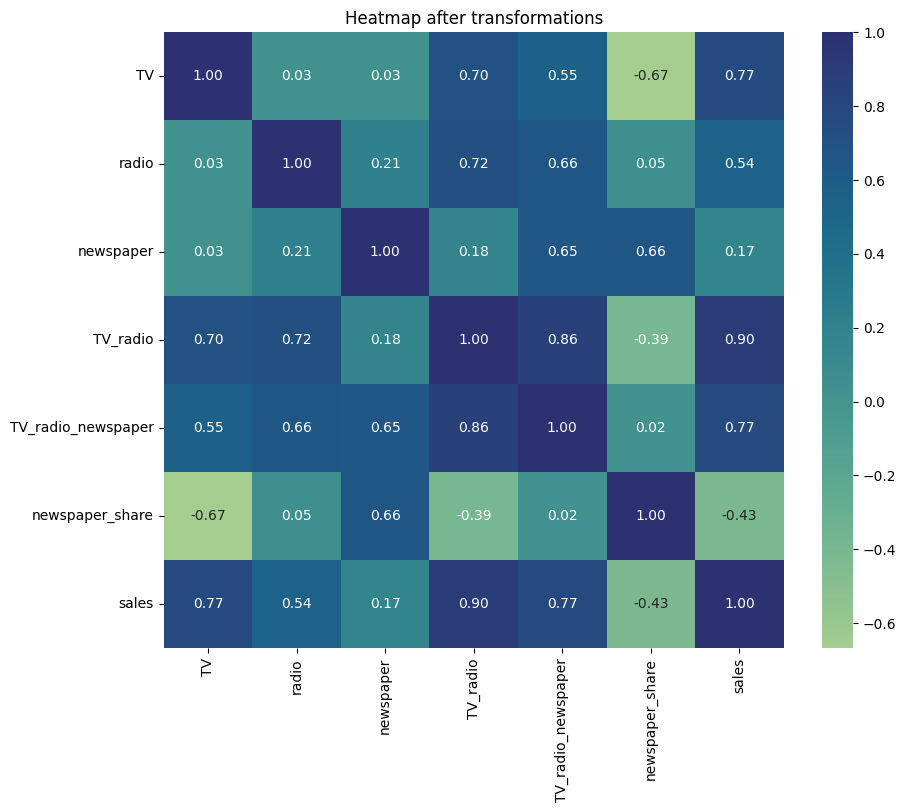

In [ ]:
df_regr_win_scaled = df_regr_win_scaled_copy.copy()
df_regr_win_scaled['sales'] = new_df_regr['sales']
regr_win_scaled_corr_matrix = df_regr_win_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(regr_win_scaled_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after transformations')
plt.show()

Видно, что `TV_radio_newspaper` после преобразований сильно коррелирует с `TV_radio` выше заданного нами порога в 0.8. Так как `TV_radio` сильнее коррелирует с целевой переменной `sales`, удалим признак `TV_radio_newspaper`. В остальном корреляции приемлемые.

Посчитаем матрицу корреляций и выведем тепловую карту после удаления признака `TV_radio_newspaper`

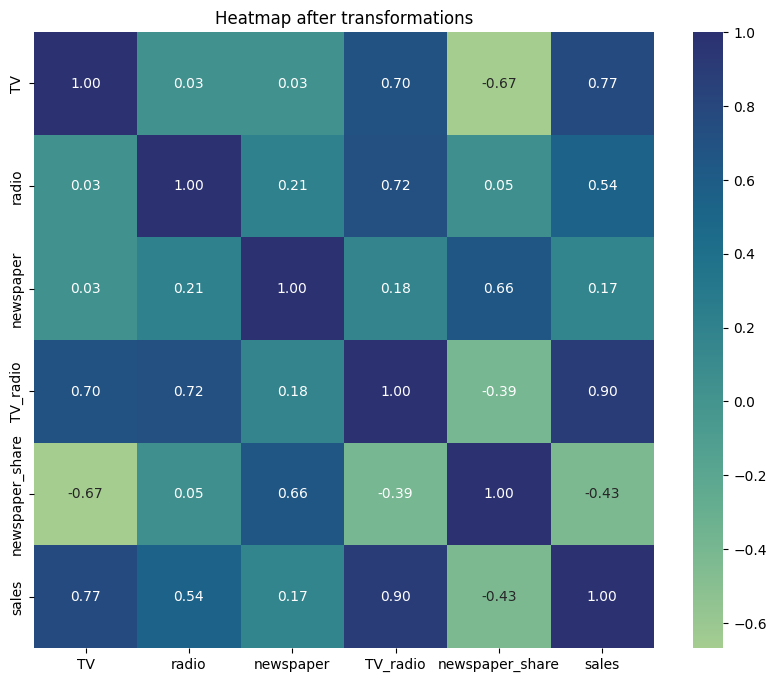

In [ ]:
new_df_regr_win_scaled = df_regr_win_scaled.copy().drop(['TV_radio_newspaper'],
                                                        axis=1)
new_regr_win_scaled_corr_matrix = new_df_regr_win_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(new_regr_win_scaled_corr_matrix, annot=True,
            cmap='crest', fmt='.2f')
plt.title('Heatmap after transformations')
plt.show()

Финальный результат выглядит неплохо. Можно было бы уменьшить количество параметров, удалив слабо коррелирующий с целевой переменной признак `newspaper`, но это не обязательно улучшит результат обучения (предполагаемой будущей) модели. Оставим этот признак в пользу его оригинальности (был в датасете изначально).

Построим гистограммы каждого признака. Выведем график

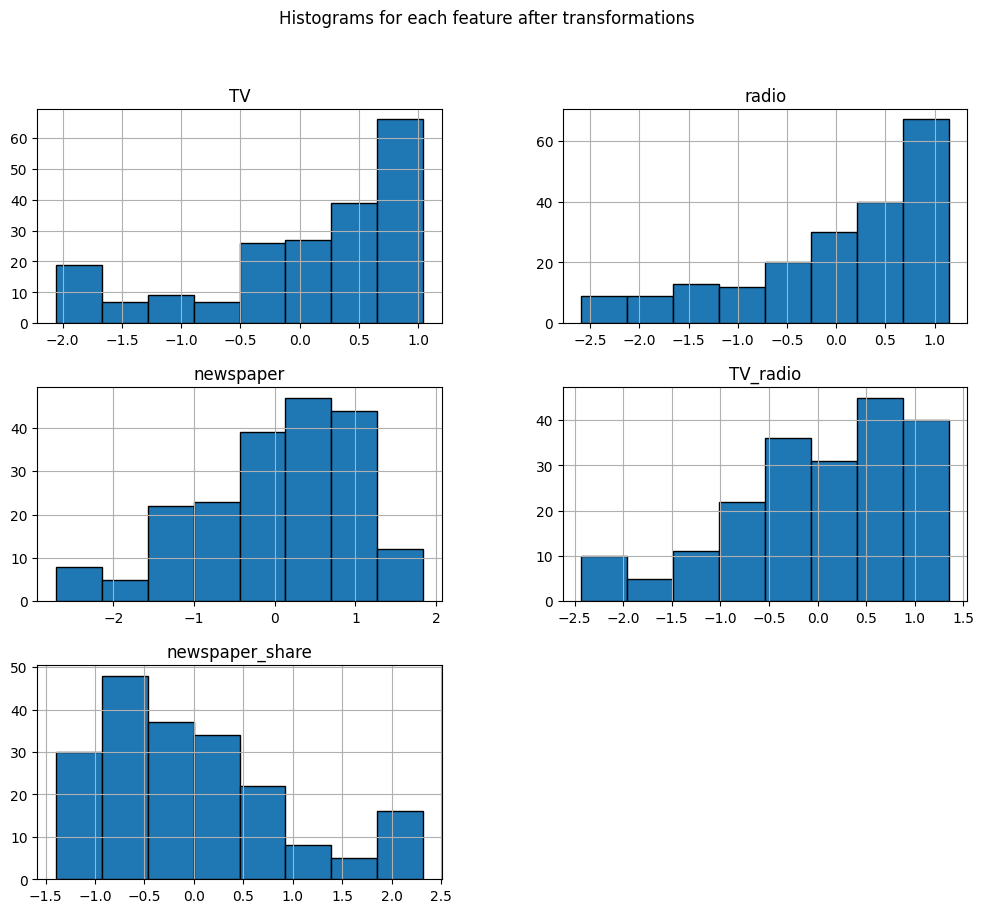

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

new_df_regr_win_scaled_copy = new_df_regr_win_scaled.copy()\
                              .drop(['sales'], axis=1)
k = int(1 + np.floor(np.log2(new_df_regr_win_scaled_copy.shape[0])))
new_df_regr_win_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after transformations')
plt.show()

Распределения перебалансированы после винсоризации. Хвосты стали менее длинными, однако на краях столбцы ожидаемо увеличились. Возможно стоило применить винсоризацию до применения z-scaling.

Построим графики KDE. Выведем рисунок

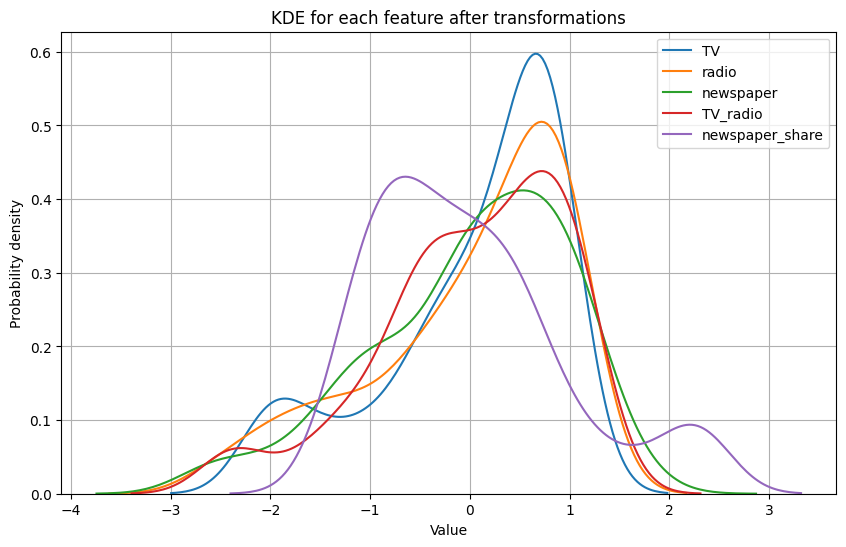

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['TV', 'radio', 'newspaper', 'TV_radio', 'newspaper_share']:
    sns.kdeplot(new_df_regr_win_scaled[feature], label=feature)
plt.title("KDE for each feature after transformations")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Ожидаемо распределения стали меньше походить на нормальные из-за перебалансировки краев. Тем не менее, данные все еще сконцентрированы рядом в одном масштабе, а значит датасет определенно готов к использованию.

А что, если бы удалили выбросы? Напишем метод, который итеративно удаляет все значения и аномалии, не проходящие расписанные ранее проверки. Удалить выбросы один раз недостаточно -- после удаления поменяются значения квантилей, а значит и сама формула тоже. Выведем очищенную таблицу

In [ ]:
def iterative_outlier_removal(dataset: pd.DataFrame, max_iter=5):
    cleaned_df = dataset.copy()
    for i in range(max_iter):
        outliers_to_clean = find_outliers(cleaned_df)
        cleaned_df = cleaned_df[~outliers_to_clean.any(axis=1)]

        z_sc = cleaned_df[cleaned_df.columns].apply(zscore)
        anomalies_to_clean = (z_sc.abs() > 3)
        cleaned_df = cleaned_df[~anomalies_to_clean.any(axis=1)]

        if outliers_to_clean.sum().sum() == 0\
           and anomalies_to_clean.any(axis=1).sum() == 0:
            break

    return cleaned_df

cleaned_df_regr_scaled = iterative_outlier_removal(df_regr_scaled\
                                                   .drop(['sales'], axis=1))
cleaned_df_regr_scaled['sales'] = df_regr_scaled\
                                  .loc[cleaned_df_regr_scaled.index, 'sales']
cleaned_df_regr_scaled

TV     radio  newspaper  TV_radio  TV_radio_newspaper  \
0    0.781107  0.850789   1.270548  1.063191            1.398242   
1   -0.911701  0.892779   0.784008  0.018653            0.385890   
3    0.348112  0.946397   1.079221  0.848682            1.150487   
4    0.531172 -0.466897   1.077274  0.090408            0.569535   
6   -0.649922  0.698068   0.052652  0.067803            0.098770   
..        ...       ...        ...       ...                 ...   
195 -1.066943 -1.485932  -0.530505 -1.615626           -1.456900   
196 -0.142693 -1.234212  -1.093193 -0.847945           -1.132884   
197  0.509169 -0.617400  -1.332444 -0.020763           -0.616914   
198  0.998012  0.964567   1.220018  1.267962            1.532788   
199  0.790083 -0.695312  -1.019319  0.104726           -0.367961   

     newspaper_share  sales  
0           0.256611   22.1  
1           1.266092   10.4  
3           0.457670   18.5  
4           0.463526   12.9  
6           0.265641   11.8  
..               ...    ...  
195         0.565180    7.6  
196        -0.757902    9.7  
197        -1.115777   12.8  
198        -0.015965   25.5  
199        -1.101376   13.4  

[166 rows x 7 columns]

Из датасета удалилось 34 строки -- 17% всех данных. Это много, но не критично.

Проверим, действительно ли выбросов больше нет. Выведем только подсчет

In [ ]:
to_clean = find_outliers(cleaned_df_regr_scaled.drop(['sales'], axis=1))
print("Outliers count after cleaning:\n" + "-" * 23 + f'\n{to_clean.sum()}')

features = ['TV', 'radio', 'newspaper',
            'TV_radio', 'TV_radio_newspaper', 'newspaper_share']
z_sc_2 = cleaned_df_regr_scaled.drop(['sales'], axis=1)[features].apply(zscore)
anom_to_clean = (z_sc_2.abs() > 3).any(axis=1)
print("-" * 23 + f"\nAnomalies count after cleaning: {anom_to_clean.sum()}")

Outliers count after cleaning:
-----------------------
TV                    0
radio                 0
newspaper             0
TV_radio              0
TV_radio_newspaper    0
newspaper_share       0
dtype: int64
-----------------------
Anomalies count after cleaning: 0


Все выбросы и аномалии были удалены.

Построим "ящик с усами". Выведем рисунок

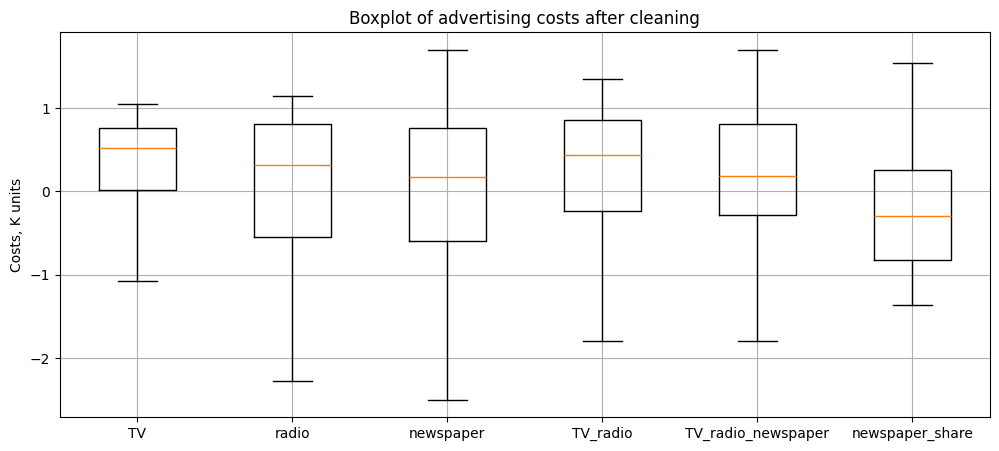

In [ ]:
cleaned_df_regr_scaled_copy = cleaned_df_regr_scaled.copy().drop(['sales'],
                                                                 axis=1)
plt.figure(figsize=(12, 5))
plt.boxplot([cleaned_df_regr_scaled_copy[col].values \
             for col in cleaned_df_regr_scaled_copy.columns],
             tick_labels=cleaned_df_regr_scaled_copy.columns)
plt.title('Boxplot of advertising costs after cleaning')
plt.ylabel('Costs, K units')
plt.grid()
plt.show()

В сравнении с винсоризацией больше всего изменился признак `TV` -- нижний ус поднялся на +1 значение.

Вычислим матрицу корреляций и построим тепловую карту. Покажем рисунок

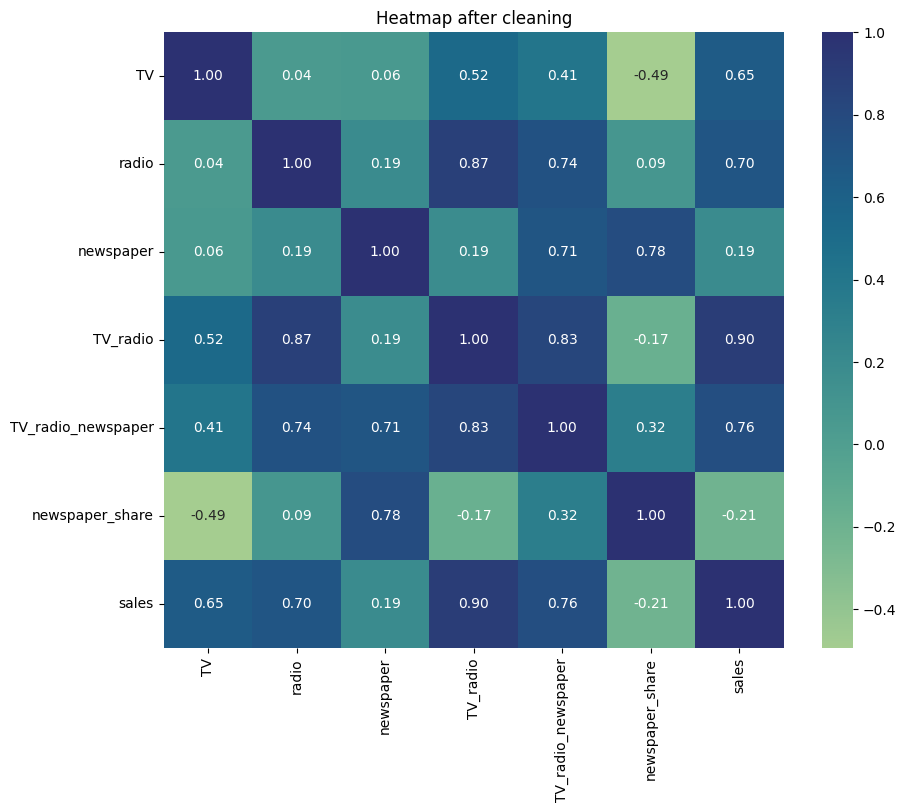

In [ ]:
cleaned_regr_scaled_corr_matrix = cleaned_df_regr_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_regr_scaled_corr_matrix, annot=True,
            cmap='crest', fmt='.2f')
plt.title('Heatmap after cleaning')
plt.show()

После удаления данных значительно усилилась корреляция между признаками `TV_radio` и `radio` с `TV_radio_newspaper`. Хоть `TV_radio` больше всех коррелирует с целевой переменной, но он пересекается с одним оригинальным признаком, хорошо коррелирующим с `sales`, и одним новым, поэтому данное сочетание мы удалим. Кроме того, `newspaper_share` стал значительно меньше коррелировать с целевой переменной, при этом сильно коррелируя с `newspaper`. Удалим и этот новый признак в пользу оригинального. Итого остался только один новый признак -- `TV_radio_newspaper`. Стоит заметить, что теперь `radio` больше коррелирует с продажами, чем `TV`. Скорее всего это означает, что выбросы `TV` на самом деле были значимыми.

Посчитаем матрицу корреляций и построим тепловую карту датасета после удаления признаков. Выведем рисунок

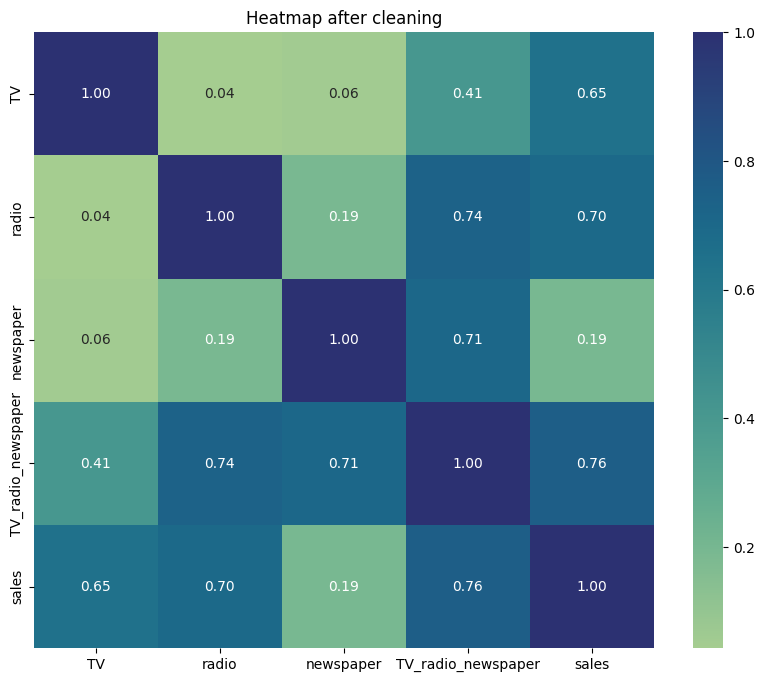

In [ ]:
new_cleaned_df_regr_scaled = cleaned_df_regr_scaled\
                             .drop(['TV_radio', 'newspaper_share'], axis=1)
new_cleaned_regr_scaled_corr_matrix = new_cleaned_df_regr_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(new_cleaned_regr_scaled_corr_matrix, annot=True,
            cmap='crest', fmt='.2f')
plt.title('Heatmap after cleaning')
plt.show()

Результат неплохой, но все выброы удалять не стоило. Новый признак `TV_radio_newspaper` в принципе находится на грани удаления, так как сильно коррелирует с двумя другими признаками в датасете.

Построим гистограммы каждого признака. Выведем график

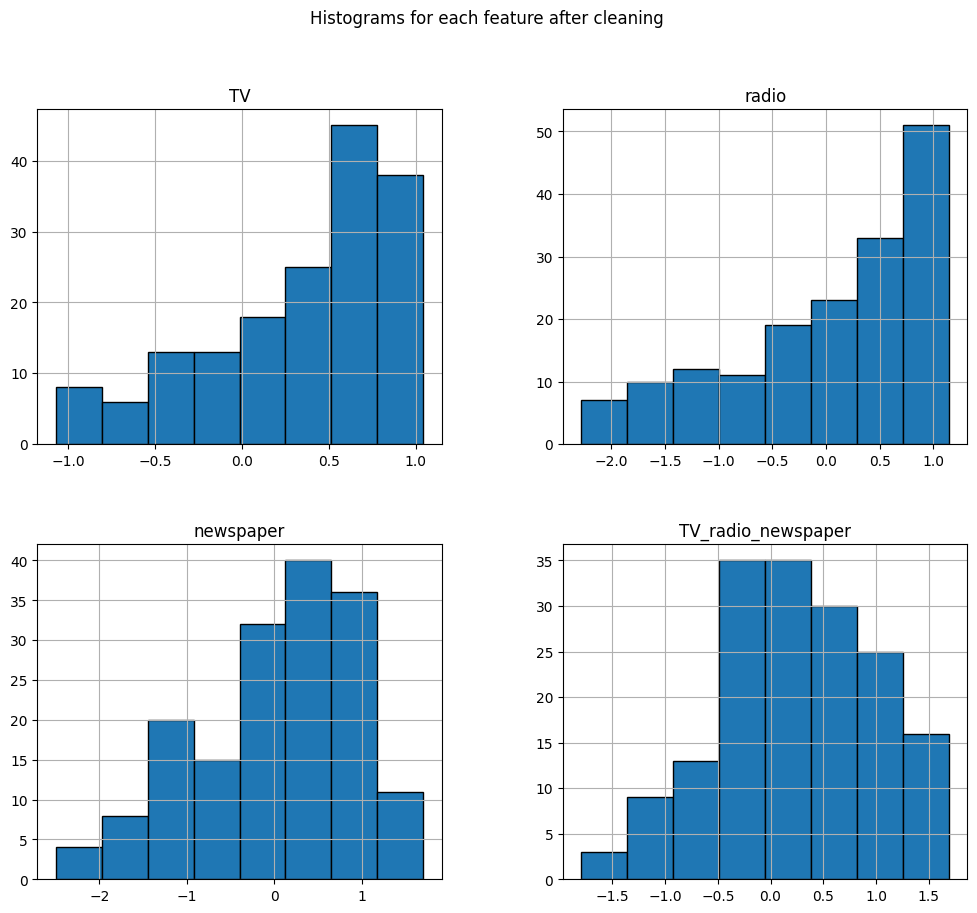

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

new_cleaned_df_regr_scaled_copy = new_cleaned_df_regr_scaled.drop(['sales'], axis=1)
k = int(1 + np.floor(np.log2(new_cleaned_df_regr_scaled_copy.shape[0])))
new_cleaned_df_regr_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after cleaning')
plt.show()

Как видим, данные немного перебалансировались. На хвостах почти нет лишних возвышений столбцов. С точки зрения нормального распределения это хорошо. Не очень хорошо, что у `TV_radio_newspaper` два одинаково высоких столбца.

Построим KDE каждого признака. Выведем график

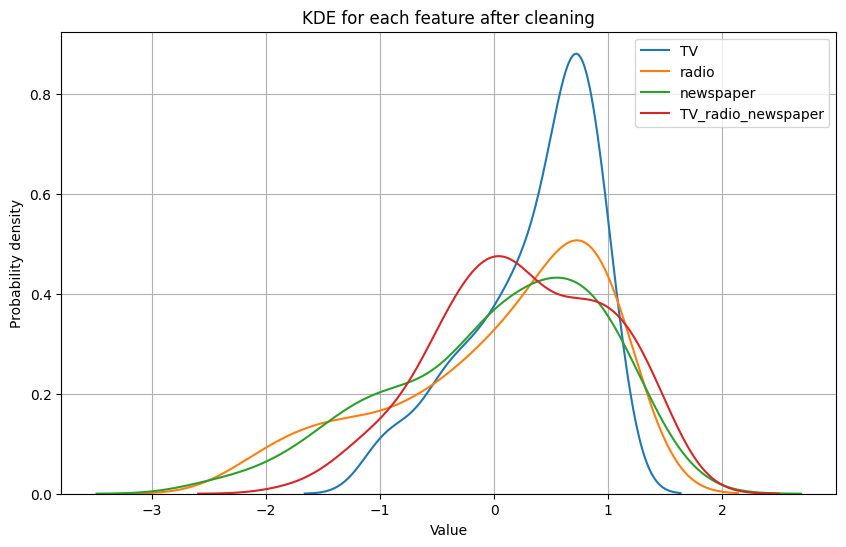

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['TV', 'radio', 'newspaper', 'TV_radio_newspaper']:
    sns.kdeplot(new_cleaned_df_regr_scaled[feature], label=feature)
plt.title("KDE for each feature after cleaning")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Хоть в этом датасете на 1 признак меньше, чем в винсоризованном, но более гладкие хвосты (большая схожесть с нормальным распределением) скажется на (предполагаемой будущей обучаемой) модели лучше.

###Результат

Сохраним датасеты.

Датасет `new_advertising`. Описание новых атрибутов:
1. `TV_radio` -- одновременно реклама на ТВ и на радио
2. `newspaper_share` -- доля затрат на газеты от общего бюджета

Датасет `clean_advertising`. Описание новых атрибутов:
1. `TV_radio_newspaper` -- одновременно реклама на всех каналах

Определить, какой лучше, можно, непосредственно обучив и оценив модель на обоих датасетах.

In [ ]:
new_df_regr_win_scaled.to_csv('drive/My Drive/new_advertising.csv',
                              index=False)
new_cleaned_df_regr_scaled.to_csv('drive/My Drive/clean_advertising.csv',
                                  index=False)

##Датасет для классификации

Проверим датасет на отсутствующие значения

In [ ]:
missing_value_checker(df_classif)

[]
0


Таковых не нашлось.

###Извлечение новых признаков

Извлечем признаки из датасета:
1. `age_heart_rate_reserve` -- запас частоты сердечных сокращений в пересчете на возраст. Рассчитывается как разница между максимальным пульсом и пиковым значением в электрокардиограмме при физической нагрузке по сравнению с состоянием покоя, деленная на возраст пациента
2. `physical_fitness` -- физическая подготовка пациента. Рассчитывается как отношение давления покоя к максимальному пульсу
3. `chol_to_age` -- отношение холестерина к возрасту. Рассчитывается как называется

Из категориальных признаков извлекать признаки не будем. Как минимум потому, что большинство из них могут принимать нулевое значение.

Выведем таблицу с новыми признаками

In [ ]:
new_df_classif = df_classif.copy().drop(['target'], axis=1)

new_df_classif = new_df_classif.drop(['fbs', 'restecg'], axis=1)
new_df_classif['age_heart_rate_reserve'] = (new_df_classif['thalach'] -\
                                            new_df_classif['oldpeak']) /\
                                            new_df_classif['age']
new_df_classif['physical_fitness'] = new_df_classif['trestbps'] /\
                                     new_df_classif['thalach']
new_df_classif['chol_to_age'] = new_df_classif['chol'] / new_df_classif['age']
new_df_classif['target'] = df_classif['target']

new_df_classif

age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal  \
0     63    1   3       145   233      150      0      2.3      0   0     1   
1     37    1   2       130   250      187      0      3.5      0   0     2   
2     41    0   1       130   204      172      0      1.4      2   0     2   
3     56    1   1       120   236      178      0      0.8      2   0     2   
4     57    0   0       120   354      163      1      0.6      2   0     2   
..   ...  ...  ..       ...   ...      ...    ...      ...    ...  ..   ...   
298   57    0   0       140   241      123      1      0.2      1   0     3   
299   45    1   3       110   264      132      0      1.2      1   0     3   
300   68    1   0       144   193      141      0      3.4      1   2     3   
301   57    1   0       130   131      115      1      1.2      1   1     3   
302   57    0   1       130   236      174      0      0.0      1   1     2   

     age_heart_rate_reserve  physical_fitness  chol_to_age  target  
0                  2.344444          0.966667     3.698413       1  
1                  4.959459          0.695187     6.756757       1  
2                  4.160976          0.755814     4.975610       1  
3                  3.164286          0.674157     4.214286       1  
4                  2.849123          0.736196     6.210526       1  
..                      ...               ...          ...     ...  
298                2.154386          1.138211     4.228070       0  
299                2.906667          0.833333     5.866667       0  
300                2.023529          1.021277     2.838235       0  
301                1.996491          1.130435     2.298246       0  
302                3.052632          0.747126     4.140351       0  

[303 rows x 15 columns]

Посчитаем матрицу корреляций и построим тепловую карту. Выведем рисунок

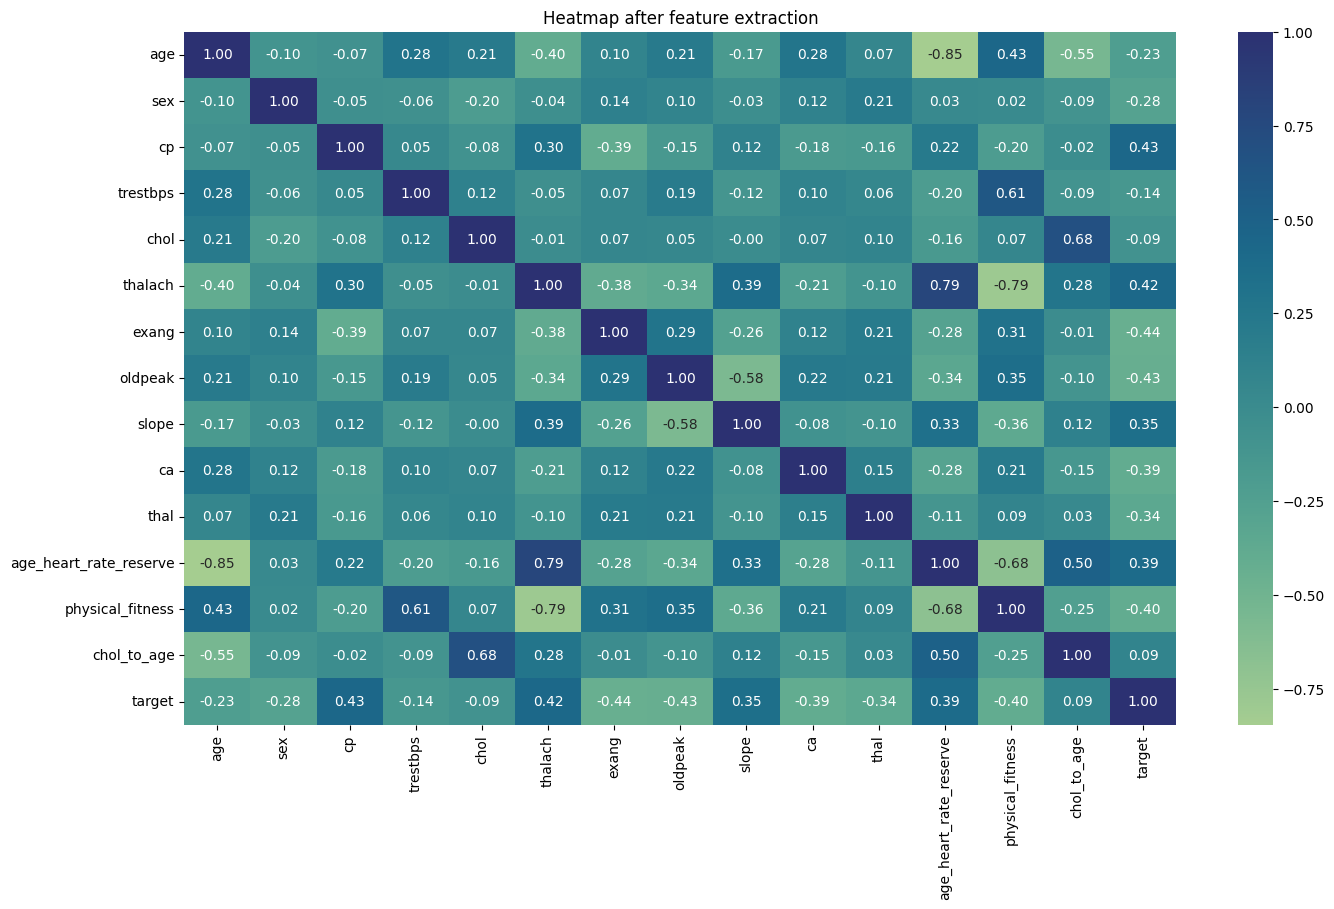

In [ ]:
new_classif_corr_matrix = new_df_classif.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(new_classif_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after feature extraction')
plt.show()

Новые признаки неплохо коррелируют с целевой переменной, кроме `chol_to_age`. Признаки `trestbps`, `thalach` и `age` следует исключить, так как они сильно коррелируют с другими признаками в датасете, при этом коррелируя с целевой переменной либо хуже, либо только чуть-чуть лучше (случай с `thalach`). Признак `chol` почти не коррелирует с целевой переменной `target`, при этом объединение с возрастом (с признаком, с которым холестерин коррелирует больше всего) не улучшило результат. Удалим `chol` и `chol_to_age`, таким образом останется два новых признака -- `age_heart_rate_reserve` и `physical_fitness`.

Посчитаем матрицу корреляции и построим тепловую карту для датасета с исключенными признаками. Покажем рисунок

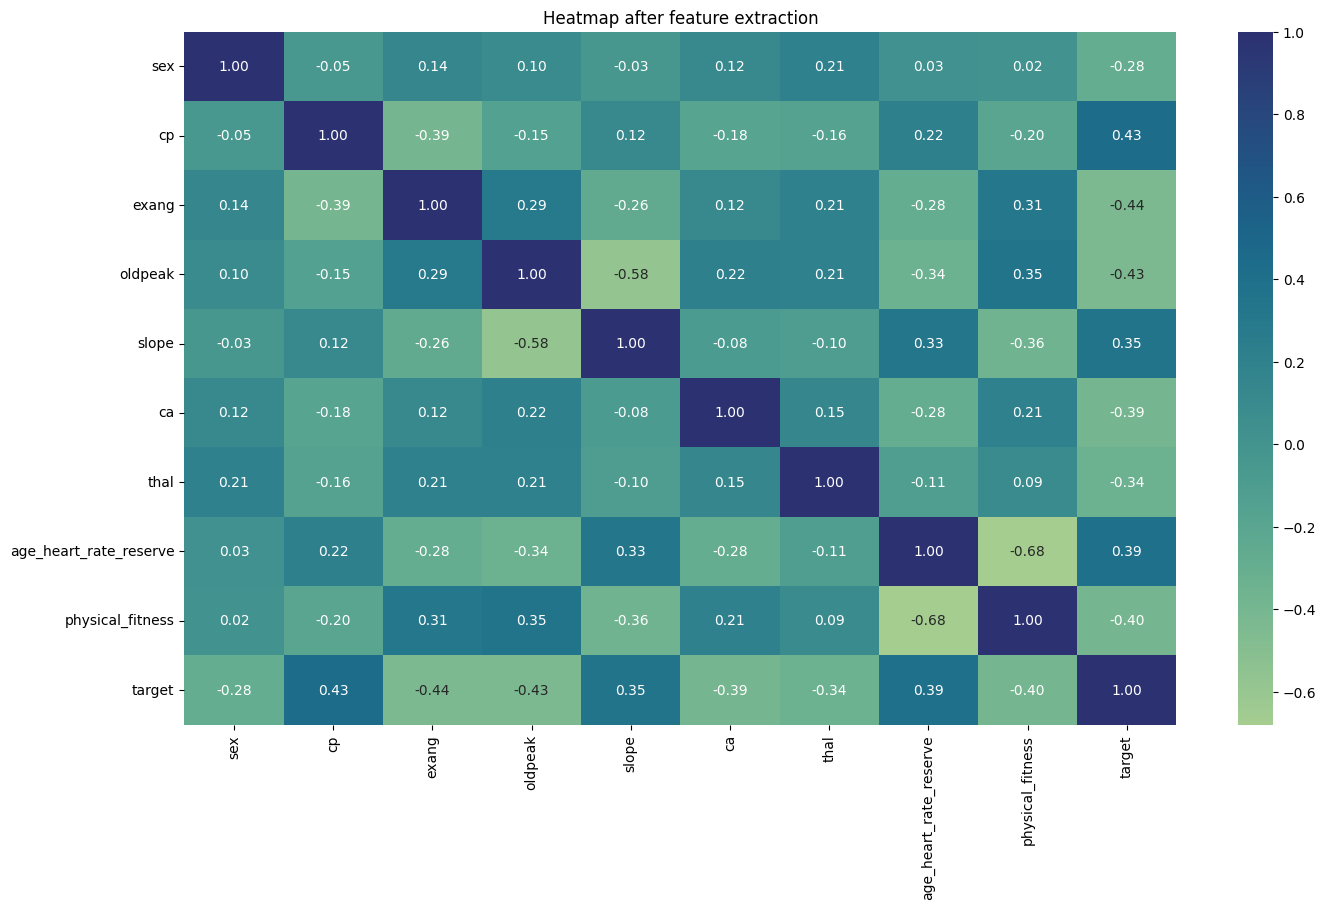

In [ ]:
new_df_classif = new_df_classif.drop(['trestbps', 'thalach', 'age',
                                      'chol', 'chol_to_age'], axis=1)
new_classif_corr_matrix = new_df_classif.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(new_classif_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after feature extraction')
plt.show()

Большинство признаков неплохо коррелируют с целевой переменной. Порог корреляции по модулю между признаками оставим равным 0.8.

###Преобразование признаков

Так как в датасете с извлеченными признаками отсутствуют колонки с особенно большими значениями, достаточно будет применить z-scaling для числовых признаков. Категориальные признаки трогать не будем. Выведем таблицу после преобразования

In [ ]:
from sklearn.preprocessing import StandardScaler

new_df_classif_copy = new_df_classif.copy()

features = ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df_classif_copy[features])
df_classif_scaled = pd.DataFrame(scaled_features, columns=features,
                                 index=new_df_classif_copy.index)

df_classif_scaled[cat_features] = new_df_classif_copy[cat_features]
df_classif_scaled

oldpeak  age_heart_rate_reserve  physical_fitness  sex  cp  exang  \
0    1.087338               -0.606321          0.298233    1   3      0   
1    2.122573                2.521655         -1.006925    1   2      0   
2    0.310912                1.566541         -0.715457    0   1      0   
3   -0.206705                0.374341         -1.108028    1   1      0   
4   -0.379244               -0.002645         -0.809770    0   0      1   
..        ...                     ...               ...  ...  ..    ...   
298 -0.724323               -0.833661          1.122947    0   0      1   
299  0.138373                0.066187         -0.342777    1   3      0   
300  2.036303               -0.990186          0.560774    1   0      0   
301  0.138373               -1.022528          1.085560    1   0      1   
302 -0.896862                0.240784         -0.757223    0   1      0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 10 columns]

Построим гистограммы каждого числового признака после преобразований (категориальные не трогали, графики такие же, как в первичном анализе). Покажем график

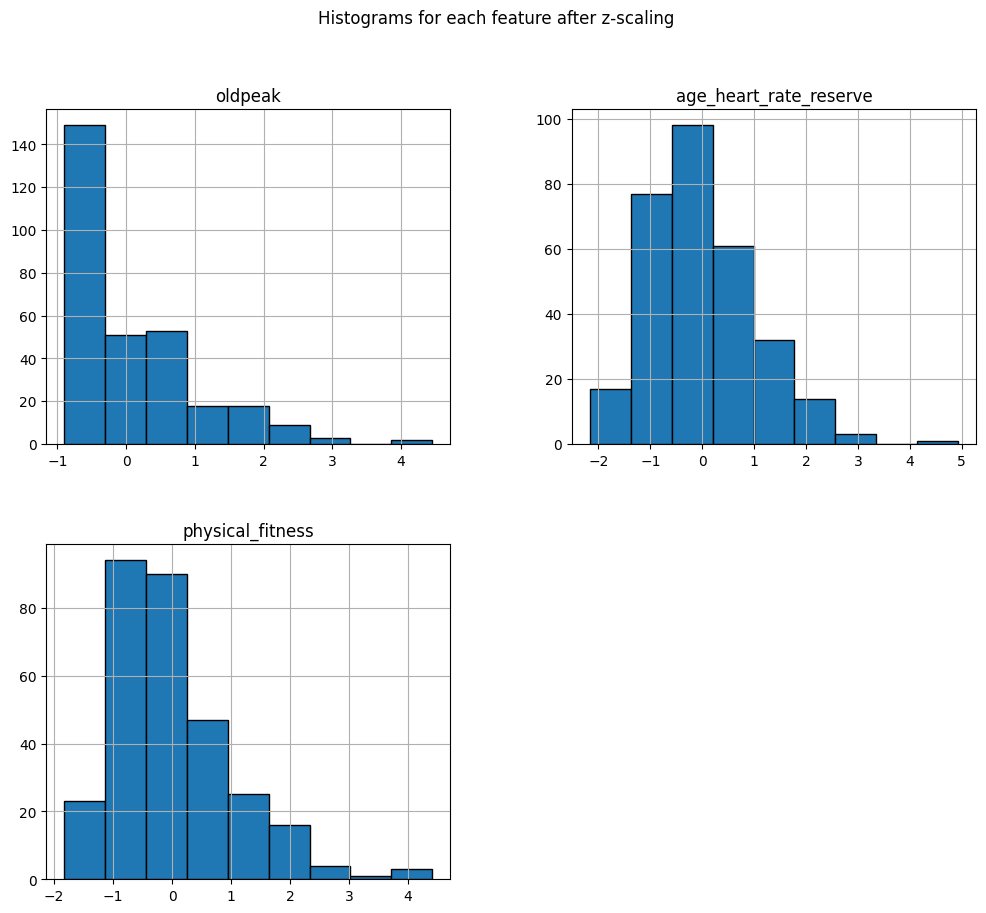

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
df_classif_scaled_copy = df_classif_scaled.copy().drop(cat_features, axis=1)
k = int(1 + np.floor(np.log2(df_classif_scaled_copy.shape[0])))
df_classif_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after z-scaling')
plt.show()

На каждом графике наблюдаем длинные правые хвосты, вызванные маленькими столбцами, похожими на выбросы. Все числовые данные сосредоточены слева.

Построим KDE каждого числового признака. Покажем график

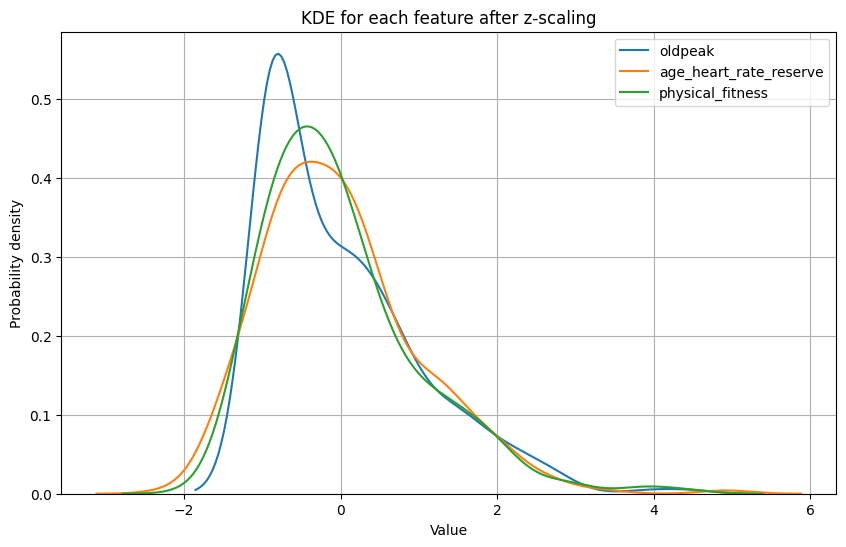

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']:
    sns.kdeplot(df_classif_scaled[feature], label=feature)
plt.title("KDE for each feature after z-scaling")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Распределения имеют длинные правые хвосты, приведены к одному масштабу, похожи на нормальные.

Вычислим матрицу корреляций и построим тепловую карту после преобразований датасета. Покажем рисунок

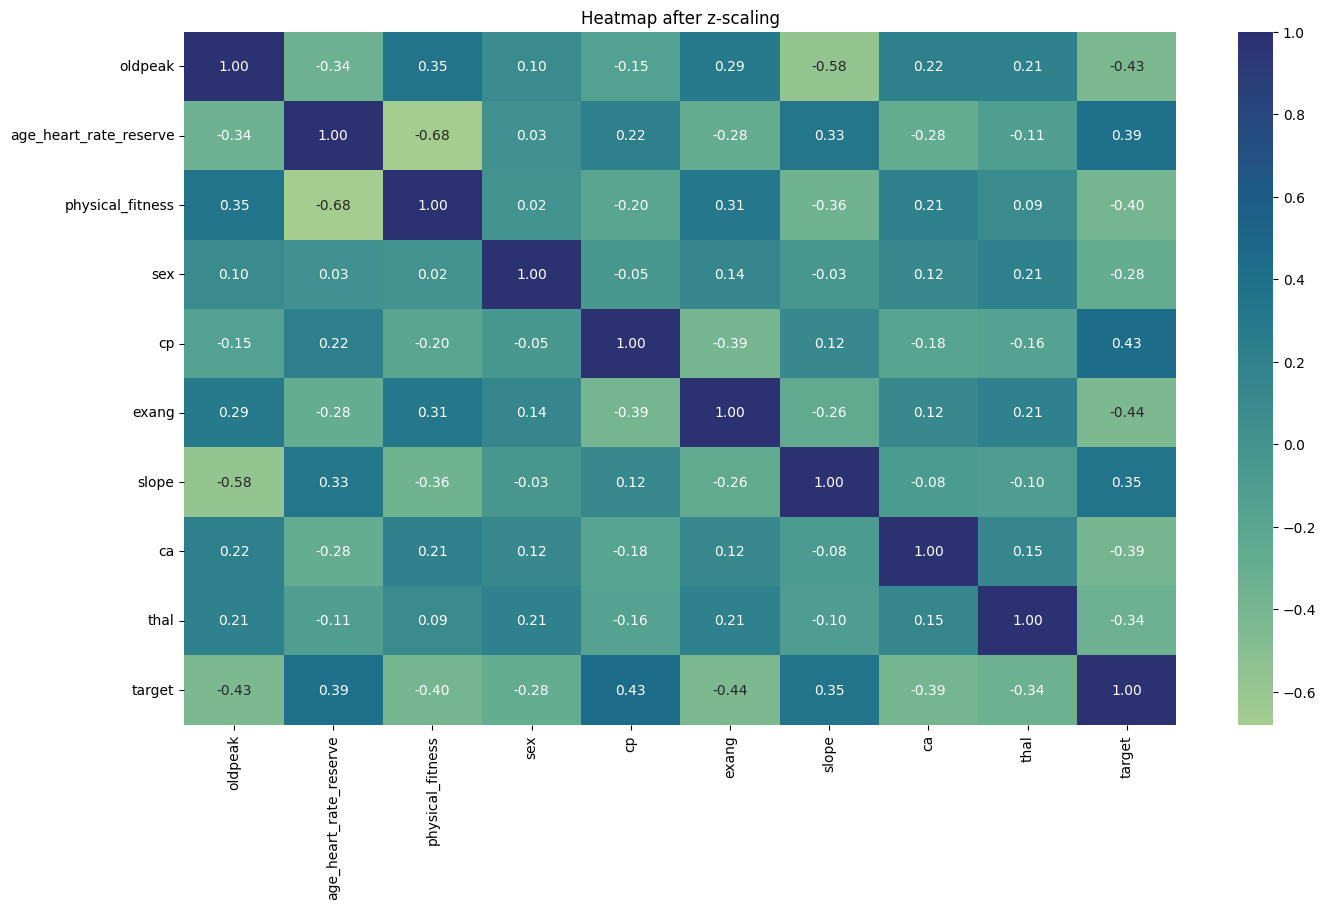

In [ ]:
classif_scaled_corr_matrix = df_classif_scaled.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(classif_scaled_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after z-scaling')
plt.show()

Сильно коррелирующих между собой признаков не появилось, признаки по прежнему неплохо коррелируют с целевой переменной.

###Отбор признаков и объектов

Проверим числовые признаки на выбросы. Категориальные рассмотрим отдельно -- помним, что при нахождении минимумов и максимумов по колонкам нашлись аномальные значения. Выведем числовые признаки и соответствующие им количества выбросов, также построим график "ящик с усами"

Outliers count:
---------------------------
oldpeak                   8
age_heart_rate_reserve    6
physical_fitness          9
dtype: int64


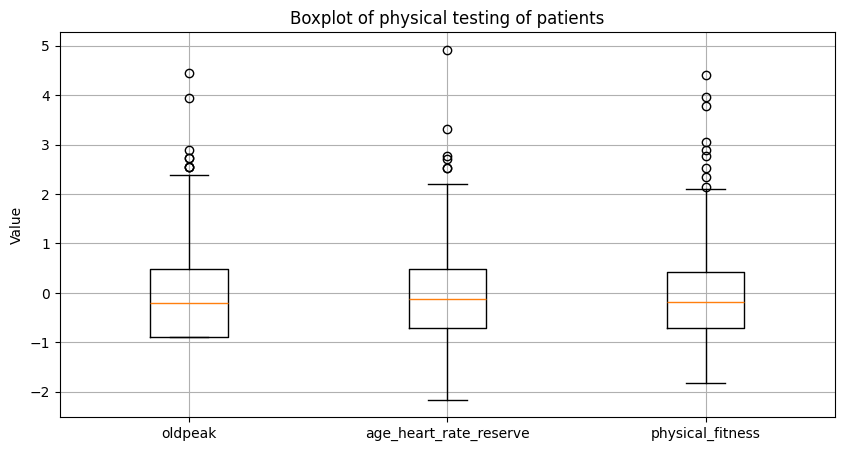

In [ ]:
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
df_classif_scaled_copy = df_classif_scaled.copy().drop(cat_features, axis=1)
print("Outliers count:\n" + "-" * 27 +\
      f'\n{find_outliers(df_classif_scaled_copy).sum()}')

plt.figure(figsize=(10, 5))
plt.boxplot([df_classif_scaled_copy[col].values \
             for col in df_classif_scaled_copy.columns],
             tick_labels=df_classif_scaled_copy.columns)
plt.title('Boxplot of physical testing of patients')
plt.ylabel('Value')
plt.grid()
plt.show()

Все выбросы находятся за границей $Q_3+1.5\cdot IQR$, у `physical_fitness` выбросы более сгруппированные. Возможно лучшей стратегией было бы удалить несгруппированные выбросы, которые лучше всего заметны сверху графика у `oldpeak` и `age_heart_rate_reserve`.

Найдем аномалии в числовых признаках, выведем строки с ними из таблицы и их общее количество

In [ ]:
from scipy.stats import zscore

features = ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']
z_scores = df_classif_scaled_copy[features].apply(zscore)
anomalies = (z_scores.abs() > 3).any(axis=1)
print(f"Anomalies count: {anomalies.sum()}\n" + '-' * 56)
df_classif_scaled_copy[anomalies]

Anomalies count: 8
--------------------------------------------------------


oldpeak  age_heart_rate_reserve  physical_fitness
72  -0.896862                4.921221         -1.255106
125 -0.292975                3.319507         -1.394434
204  4.451851               -0.732796          0.955821
221  3.934233               -1.118374          1.714518
243  0.138373               -1.589130          3.954903
266  2.036303               -0.940037          3.047180
272 -0.034166               -2.160931          3.776389
297 -0.034166               -1.606274          4.411380

Применим винсоризацию для числовых признаков. Для категориальных вручную исправим значения `thal` (минимум 0, должен быть 1, заменим на 1) и `ca` (максимум 4, должен быть 3, заменим на 3) аналогично винсоризации. Выведем результаты проверки на наличие выбросов и аномалий, построим "ящик с усами"

Outliers count after winsorization:
---------------------------
oldpeak                   0
age_heart_rate_reserve    0
physical_fitness          0
dtype: int64
---------------------------
Anomalies count after winsorization: 0
Minimum thal: 1
Maximum ca: 3


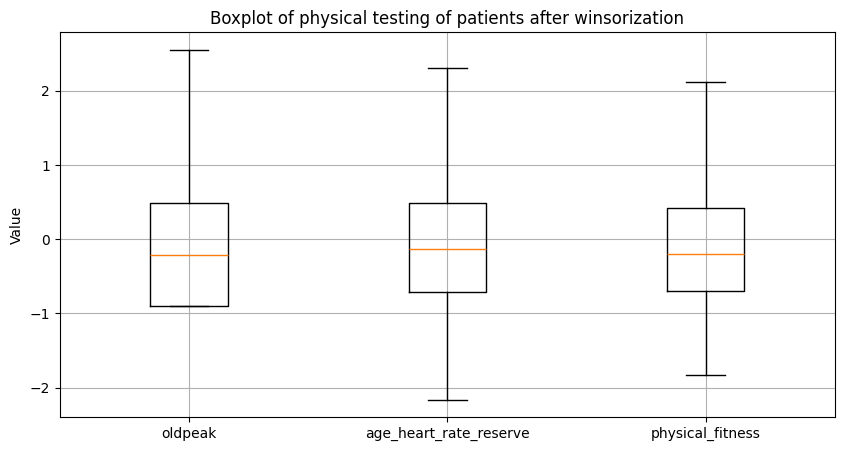

In [ ]:
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
df_classif_win_scaled_copy = df_classif_scaled.copy().drop(cat_features, axis=1)
df_classif_win_scaled_copy = winsorization(df_classif_win_scaled_copy)
print("Outliers count after winsorization:\n" + "-" * 27 +\
      f'\n{find_outliers(df_classif_win_scaled_copy).sum()}')

features = ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']
win_z_scores = df_classif_win_scaled_copy[features].apply(zscore)
win_anomalies = (win_z_scores.abs() > 3).any(axis=1)

df_classif_win_scaled = df_classif_win_scaled_copy.copy()
df_classif_win_scaled[cat_features] = df_classif_scaled[cat_features]
df_classif_win_scaled['ca'] = df_classif_win_scaled['ca']\
                              .replace(4, 3)
df_classif_win_scaled['thal'] = df_classif_win_scaled['thal']\
                                .replace(0, 1)
print("-" * 27 +\
      f"\nAnomalies count after winsorization: {win_anomalies.sum()}\n" +\
      f"Minimum thal: {df_classif_win_scaled['thal'].min()}\n" +\
      f"Maximum ca: {df_classif_win_scaled['ca'].max()}")

plt.figure(figsize=(10, 5))
plt.boxplot([df_classif_win_scaled[col].values \
             for col in features], tick_labels=features)
plt.title('Boxplot of physical testing of patients after winsorization')
plt.ylabel('Value')
plt.grid()
plt.show()

Выбросов в признаках больше нет, минимум и максимум для `thal` и `ca` соответственно исправлены.

Посчитаем матрицу корреляций и построим тепловую карту. Покажем рисунок

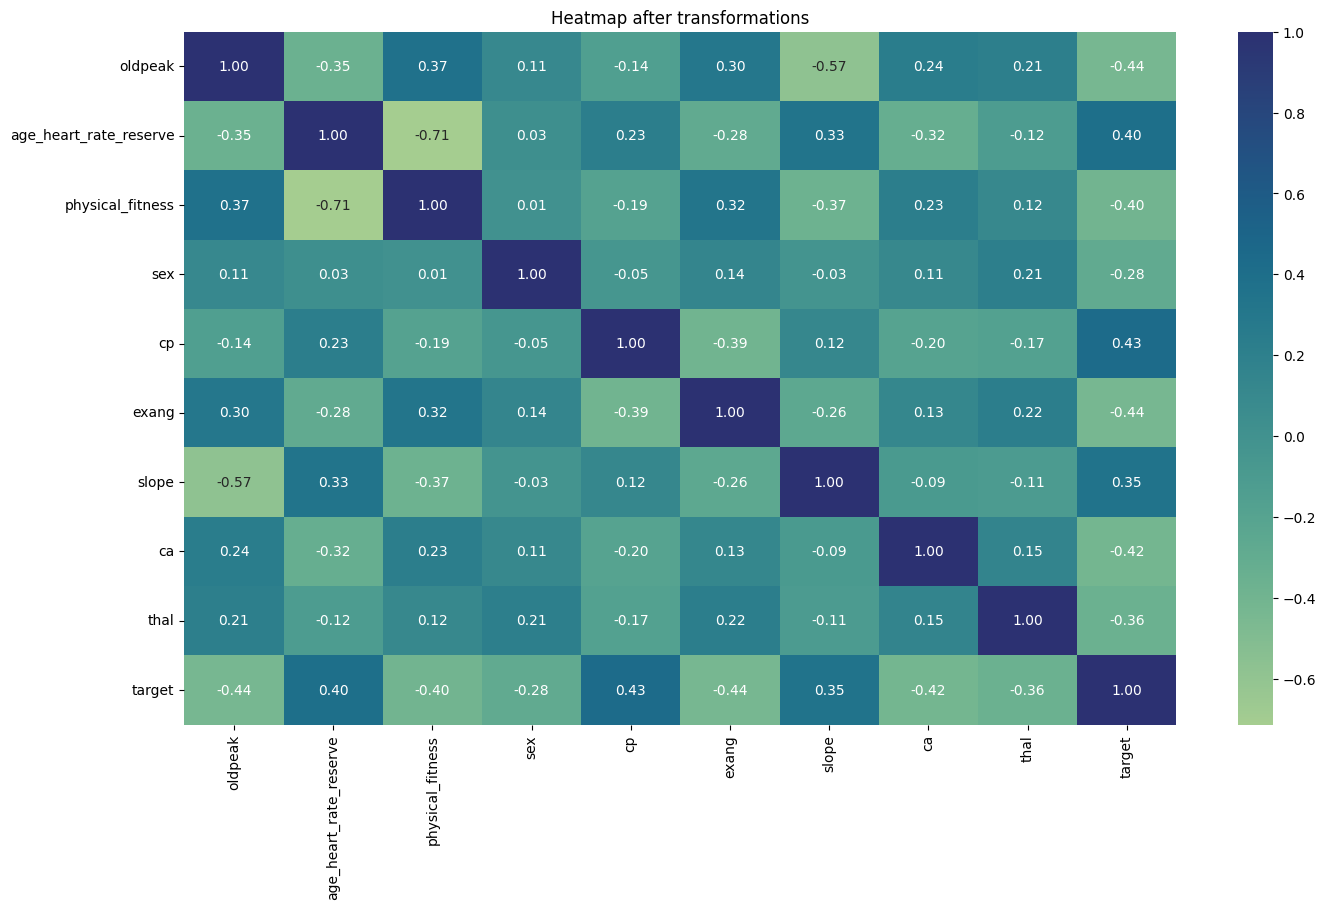

In [ ]:
classif_win_scaled_corr_matrix = df_classif_win_scaled.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(classif_win_scaled_corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap after transformations')
plt.show()

Корреляция признаков с целевой переменной немного улучшилась. Корреляция между двумя новыми признаками по модулю увеличилась, но не достигла заданного порога. В таком случае оставим все как есть -- не будем удалять признаки.

Построим гистограммы каждого числового признака, а также категориальных `thal` и `ca`. Покажем график

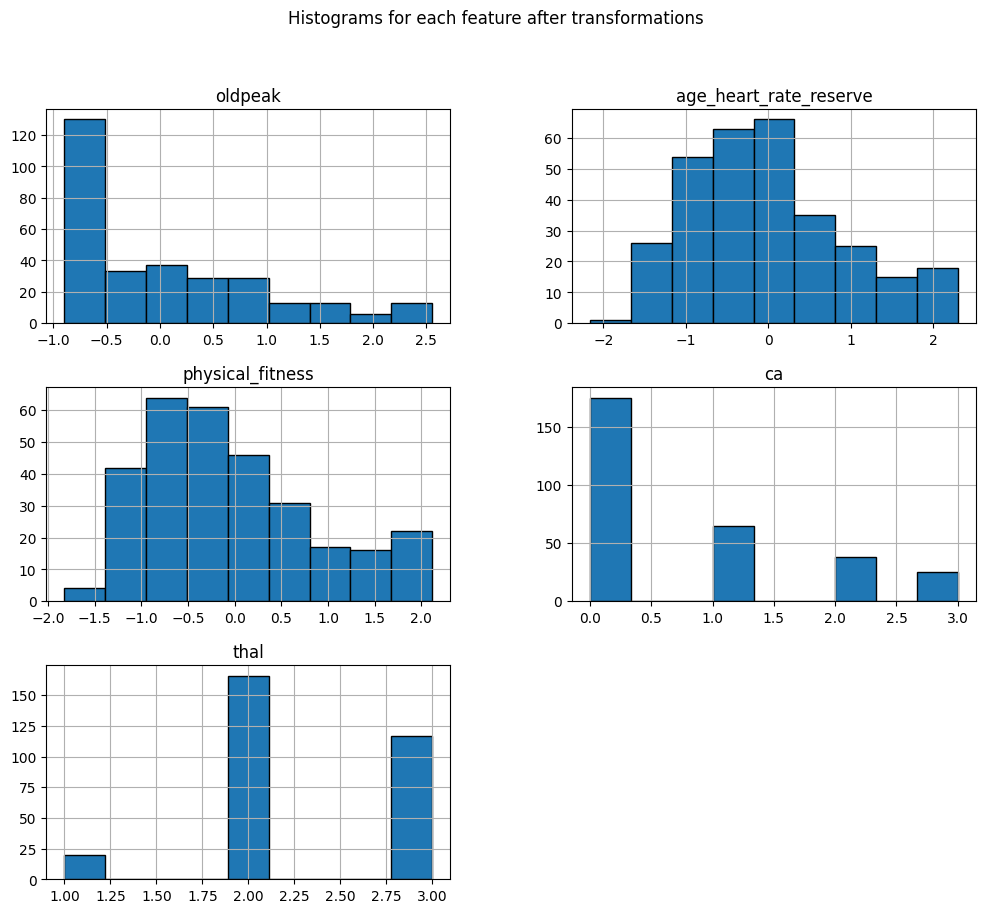

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

some_cat_features = ['sex', 'cp', 'exang', 'slope', 'target']
df_classif_win_scaled_copy = df_classif_win_scaled.copy()\
                             .drop(some_cat_features, axis=1)
k = int(1 + np.floor(np.log2(df_classif_win_scaled_copy.shape[0])))
df_classif_win_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after transformations')
plt.show()

На концах правых хвостов числовых признаков ожидаемо увеличились столбцы, в остальном ничего не изменилось. Гистограммы категориальных признаков теперь не содержат значений, непредусмотренных описанием датасета.

Построим KDE для каждого числового признака. Для категориальных `thal` и `ca` графики ядерной оценки плотности потеряют пики, соответствующие аномальным значениям `thal` и `ca`, вместо них будут более короткие пологие хвосты. Ожидаемо увеличатся пики для значений, на которые заменили аномальные соответственно. Таким образом, строить KDE для `thal` и `ca` не будем. Покажем график

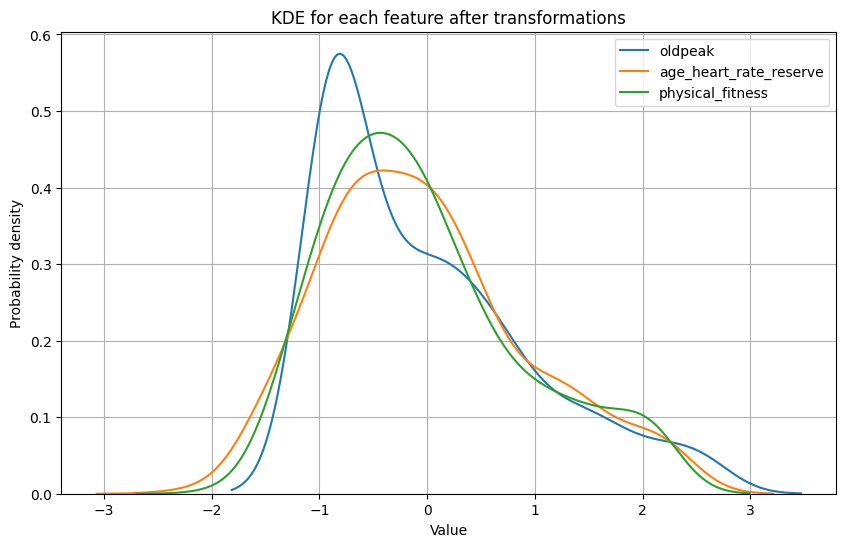

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']:
    sns.kdeplot(df_classif_win_scaled[feature], label=feature)
plt.title("KDE for each feature after transformations")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Распределения числовых признаков в одинаковом масштабе, есть небольшие левые хвосты, кроме `oldpeak`. Правые хвосты ожидаемо уменьшились, однако распределения стали меньше походить на нормальные, так как мы перебалансировали данные, заменив выбросы.

Попробуем не заменять выбросы, а удалять. Для начала оставим в таблице только те строки, в которых `thal` не равно 0 и `ca` не равно 4. Далее удалим итеративно выбросы числовых признаков. Выведем очищенную таблицу

In [ ]:
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
df_classif_scaled_copy = df_classif_scaled.copy()
df_classif_scaled_copy = df_classif_scaled_copy[df_classif_scaled_copy['thal'] \
                                                != 0]
df_classif_scaled_copy = df_classif_scaled_copy[df_classif_scaled_copy['ca'] \
                                                != 4]
cleaned_df_classif_scaled = iterative_outlier_removal(df_classif_scaled_copy\
                                                      .drop(cat_features,
                                                            axis=1))
cleaned_df_classif_scaled[cat_features] = df_classif_scaled_copy\
                                          .loc[cleaned_df_classif_scaled.index,
                                               cat_features]
cleaned_df_classif_scaled

oldpeak  age_heart_rate_reserve  physical_fitness  sex  cp  exang  \
0    1.087338               -0.606321          0.298233    1   3      0   
2    0.310912                1.566541         -0.715457    0   1      0   
3   -0.206705                0.374341         -1.108028    1   1      0   
4   -0.379244               -0.002645         -0.809770    0   0      1   
5   -0.551783               -0.313226          0.198617    1   0      0   
..        ...                     ...               ...  ...  ..    ...   
298 -0.724323               -0.833661          1.122947    0   0      1   
299  0.138373                0.066187         -0.342777    1   3      0   
300  2.036303               -0.990186          0.560774    1   0      0   
301  0.138373               -1.022528          1.085560    1   0      1   
302 -0.896862                0.240784         -0.757223    0   1      0   

     slope  ca  thal  target  
0        0   0     1       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
5        1   0     1       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[268 rows x 10 columns]

Мы удалили 11.55% данных, что в принципе не много.

Проверим, остались ли выбросы. Также проверим минимум и максимум `thal` и `ca` соответственно. Выведем результаты

In [ ]:
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
to_clean = find_outliers(cleaned_df_classif_scaled.drop(cat_features, axis=1))
print("Outliers count after cleaning:\n" + "-" * 27 + f'\n{to_clean.sum()}')

features = ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']
z_sc_3 = cleaned_df_classif_scaled.drop(cat_features,
                                        axis=1)[features].apply(zscore)
anom_to_clean = (z_sc_3.abs() > 3).any(axis=1)
print("-" * 27 + f"\nAnomalies count after cleaning: {anom_to_clean.sum()}\n" +\
      f"Minimum thal: {df_classif_win_scaled['thal'].min()}\n" +\
      f"Maximum ca: {cleaned_df_classif_scaled['ca'].max()}")

Outliers count after cleaning:
---------------------------
oldpeak                   0
age_heart_rate_reserve    0
physical_fitness          0
dtype: int64
---------------------------
Anomalies count after cleaning: 0
Minimum thal: 1
Maximum ca: 3


Выбросов нет, данные корректны.

Посмотрим на "ящик с усами" числовых признаков

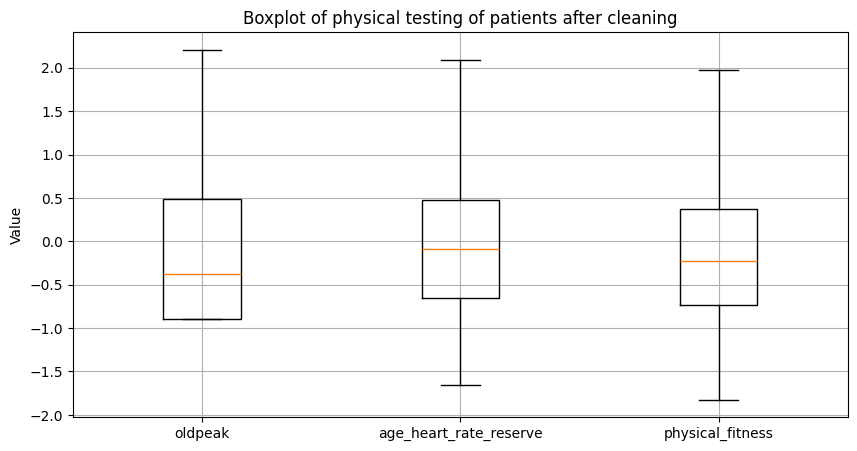

In [ ]:
cat_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']
cleaned_df_classif_scaled_copy = cleaned_df_classif_scaled.copy()\
                                 .drop(cat_features, axis=1)
plt.figure(figsize=(10, 5))
plt.boxplot([cleaned_df_classif_scaled_copy[col].values \
             for col in cleaned_df_classif_scaled_copy.columns],
             tick_labels=cleaned_df_classif_scaled_copy.columns)
plt.title('Boxplot of physical testing of patients after cleaning')
plt.ylabel('Value')
plt.grid()
plt.show()

Разница с винсоризацией небольшая. Самое заметное -- медиана `oldpeak` после чистки сместилась вниз, в то время как на графике после винсоризации она посередине.

Вычислим матрицу корреляций и построим тепловую карту очищенного датасета. Покажем график

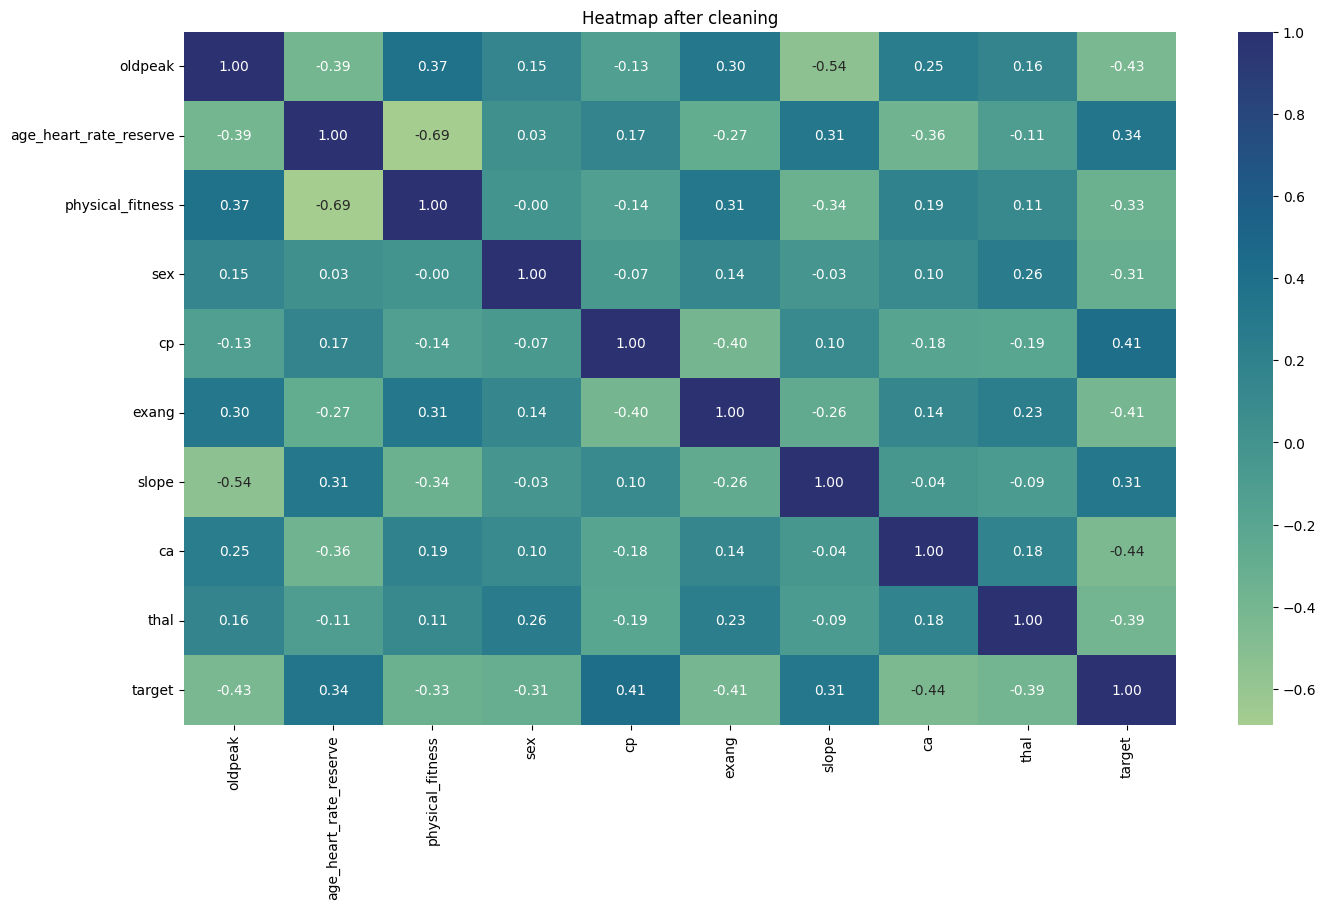

In [ ]:
cleaned_classif_scaled_corr_matrix = cleaned_df_classif_scaled.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(cleaned_classif_scaled_corr_matrix, annot=True,
            cmap='crest', fmt='.2f')
plt.title('Heatmap after cleaning')
plt.show()

Некоторые корреляции между признаками и целевой переменной стали лучше, но общая тенденция скорее на незначительное ухудшение. Сильно коррелирующих между собой признаков не появилось. Оставим как есть, не будем избавляться от каких-либо признаков.

Построим гистограммы каждого числового признака и двух категориальных `thal` и `ca`. Покажем график

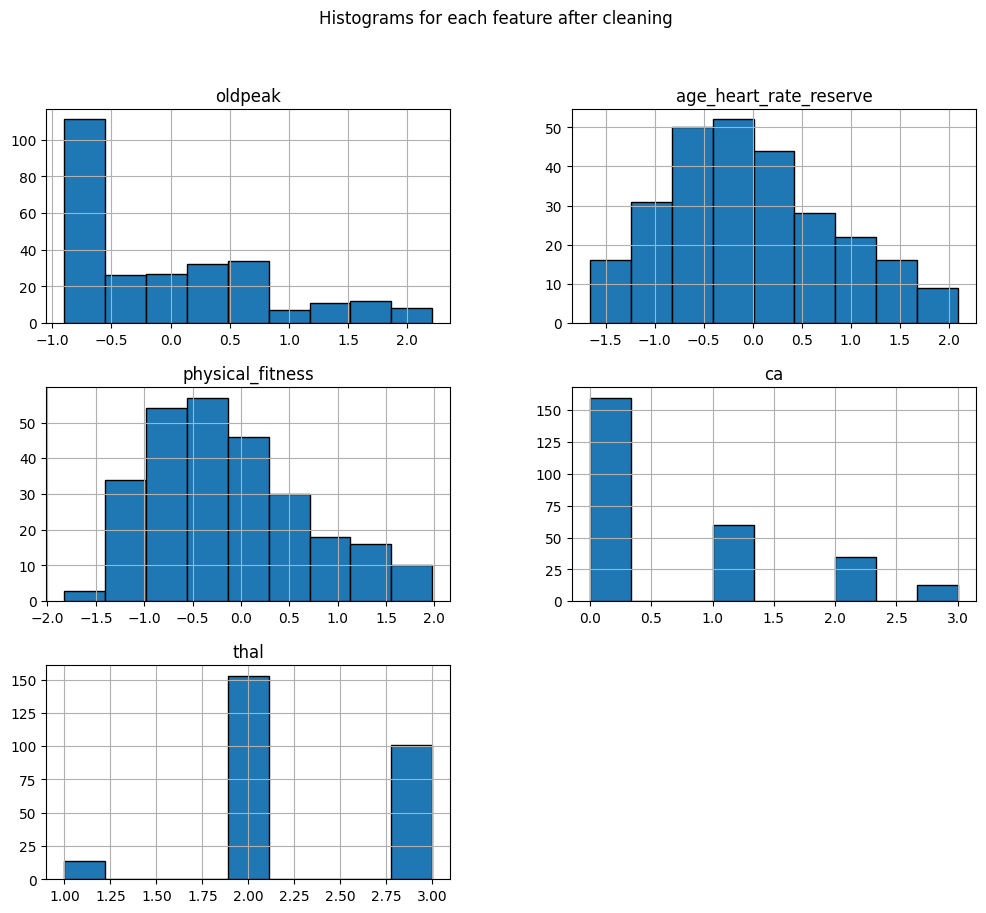

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

some_cat_features = ['sex', 'cp', 'exang', 'slope', 'target']
cleaned_df_classif_scaled_copy = cleaned_df_classif_scaled\
                                 .drop(some_cat_features, axis=1)
k = int(1 + np.floor(np.log2(cleaned_df_classif_scaled_copy.shape[0])))
cleaned_df_classif_scaled_copy.hist(bins=k, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms for each feature after cleaning')
plt.show()

Ожидаемо пропали выбросы, столбцы на хвостах не увеличились. Категориальные признаки не имеют аномальных значений. Почти все данные распределены слева.

Построим KDE каждого числового признака. На графиках ядерной оценки плотности `thal` и `ca` пики аномальных значений пропали бы, вместо них был бы пологий укороченный хвост. Кроме того, остальные пики стали бы ниже. Это видно на гистограммах. Покажем график KDE

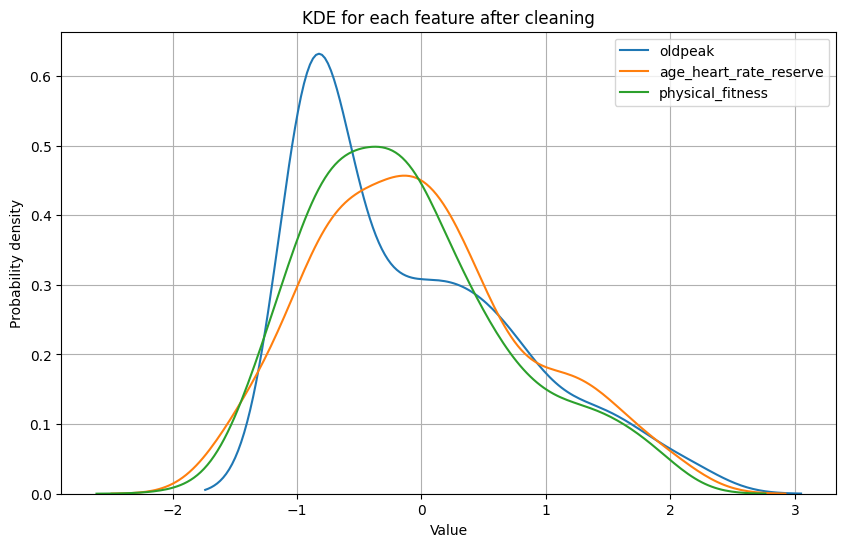

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in ['oldpeak', 'age_heart_rate_reserve', 'physical_fitness']:
    sns.kdeplot(cleaned_df_classif_scaled[feature], label=feature)
plt.title("KDE for each feature after cleaning")
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.grid()
plt.show()

Правые хвосты ожидаемо более плавные по сравнению с винсоризацией и более короткие. Левый хвост `age_heart_rate_reserve` тоже укоротился. Тем не менее, распределения не очень похожи на нормальные.

###Результат

Сохраним датасеты `new_heart` и `clean_heart`. Описание признаков:
1. `age_heart_rate_reserve` -- запас частоты сердечных сокращений в пересчете на возраст
2. `physical_fitness` -- физическая подготовка пациента

Скорее всего разность точности обучения модели на этих датасетах будет небольшая.

In [ ]:
df_classif_win_scaled.to_csv('drive/My Drive/new_heart.csv', index=False)
cleaned_df_classif_scaled.to_csv('drive/My Drive/clean_heart.csv', index=False)